In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, accuracy_score, r2_score
from xgboost import XGBRegressor, XGBClassifier
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import xgboost as xgb
from sklearn.feature_selection import mutual_info_regression
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from collections import Counter 
from functions import *
from sklearn.ensemble import VotingRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, ExtraTreesRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
# 设置中文字体 - 选择一个适合的中文字体
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS', 'SimHei', 'Microsoft YaHei']  
plt.rcParams['axes.unicode_minus'] = False  # 解决负号显示问题


%matplotlib inline

In [2]:
# data = pd.read_csv(r'/Users/wukai/Desktop/project/4.24/merged_features.csv')
# data = pd.read_csv(r'/Users/wukai/Desktop/project/4.24/merged_features_processed.csv')
data = pd.read_csv(r'/Users/wukai/Desktop/project/w_git/data/fea/final/reduced_dataset_90pct.csv')
# data = pd.read_csv(r'/Users/wukai/Desktop/project/wjob/data/fea/final/normalized_dataset.csv')

# data = pd.read_csv(r'/Users/wukai/Desktop/project/4.24/merged_features_processed_selected_enhanced.csv')
# column_x = ["H2_adsorption_energy","M2H_system","element","M_system","file_path","file_type","m_file_path","acf_path"]

if isinstance(data, pd.DataFrame):
    data = data.dropna()
else:
    data = data[~np.isnan(data).any(axis=1)]
column_x = ["element","structure_type","H2_adsorption_energy"]
# column_x = [
#        'Electronegativity', 'First_Ionization_Energy',
#        'Second_Ionization_Energy', 'Atomic_Radius', 'Covalent_Radius',
#        'Period', 'Group','Valence_Electrons','Electron_Shells']
# 分离特征和目标变量
# X = data[column_x] # 特征矩阵
X = data.drop(column_x, axis=1)
y = data["H2_adsorption_energy"]  # 目标变量向量

In [3]:
X.columns

Index(['Electronegativity', 'First_Ionization_Energy',
       'Second_Ionization_Energy', 'Atomic_Radius', 'Covalent_Radius',
       'Period', 'Group', 'Valence_Electrons', 'Electron_Shells',
       'M-H_M_H_H_PC1',
       ...
       'M-2H_H_M_M_atom1_PC3', 'M-2H_H_M_Ce_atom1_PC1',
       'M-2H_H_M_Ce_atom1_PC2', 'M-2H_H_M_Ce_atom1_PC3',
       'M-2H_H_M_Ce_atom1_PC4', 'M-2H_H_M_Ce_atom1_PC5',
       'M-2H_H_M_Ce_atom1_PC6', 'M-2H_H_Ce_Ce_atom1_PC1',
       'M-2H_H_Ce_Ce_atom1_PC2', 'M-2H_H_Ce_Ce_atom1_PC3'],
      dtype='object', length=284)

In [5]:
data0 = data[data['structure_type']=="pristine"]
data1 = data[data['structure_type']=="Ov-surf1"]
data2 = data[data['structure_type']=="Ov-surf2"]
data3 = data[data['structure_type']=="Ov-sub1"]
data4 = data[data['structure_type']=="Ov-sub2"]

X0 = data0.drop(columns=column_x) # 特征矩阵
y0 = data0['H2_adsorption_energy'] 

X1 = data1.drop(columns=column_x) # 特征矩阵
y1 = data1['H2_adsorption_energy'] 

X2 = data2.drop(columns=column_x) # 特征矩阵
y2 = data2['H2_adsorption_energy']

X3 = data3.drop(columns=column_x) # 特征矩阵
y3 = data3['H2_adsorption_energy']

X4 = data4.drop(columns=column_x) # 特征矩阵
y4 = data4['H2_adsorption_energy']
# 合并 X0, X1, X2
X_all = pd.concat([X0,X1,X2,X3,X4], axis=0, ignore_index=True)  # 沿着行方向合并
y_all = pd.concat([y0,y1,y2,y3,y4], axis=0, ignore_index=True)
X_Ov1_Fir = pd.concat([X2, X1], axis=0, ignore_index=True)
y_Ov1_Fir = pd.concat([y2, y1], axis=0, ignore_index=True)

In [6]:
# X1_train, X1_test, y1_train, y1_test = train_test_split(X3, y3, test_size=0.3, random_state=42)# Experiment 2: Use data0 + data1
X01 = pd.concat([X0, X1,X2], axis=0, ignore_index=True)
y01 = pd.concat([y0, y1,y2], axis=0, ignore_index=True)

# Experiment 3: Us data2 + data1
X31 = pd.concat([X3, X1,X2], axis=0, ignore_index=True)
y31 = pd.concat([y3, y1,y2], axis=0, ignore_index=True)


# Experiment 4: Use data3 + data1
X41 = pd.concat([X4, X1,X2], axis=0, ignore_index=True)
y41 = pd.concat([y4, y1,y2], axis=0, ignore_index=True)



X0123 = pd.concat([X0, X1,X2,X3], axis=0, ignore_index=True)
y0123 = pd.concat([y0, y1,y2,y3], axis=0, ignore_index=True)
# Experiment 3: Us data2 + data1
X0124 = pd.concat([X4, X1,X0,X2], axis=0, ignore_index=True)
y0124 = pd.concat([y4, y1,y0,y2], axis=0, ignore_index=True)

X0134 = pd.concat([X4, X1,X0,X3], axis=0, ignore_index=True)
y0134 = pd.concat([y4, y1,y0,y3], axis=0, ignore_index=True)

X0234 = pd.concat([X4, X3,X0,X2], axis=0, ignore_index=True)
y0234 = pd.concat([y4, y3,y0,y2], axis=0, ignore_index=True)

# Experiment 4: Use data3 + data1
X1234 = pd.concat([X4, X1,X3,X2], axis=0, ignore_index=True)
y1234 = pd.concat([y4, y1,y3,y2], axis=0, ignore_index=True)


In [7]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import GridSearchCV
# 创建模型
et = ExtraTreesRegressor(random_state=42, n_jobs=-1)

# 定义参数网格
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', 0.8]
}

# 创建模型
et = ExtraTreesRegressor(random_state=42, n_jobs=-1)

# 网格搜索
grid_search = GridSearchCV(
    estimator=et,
    param_grid=param_grid,
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    verbose=2
)

# 拟合数据
grid_search.fit(X_train, y_train)

# 输出最佳参数
print("最佳参数:", grid_search.best_params_)
print("最佳分数:", np.sqrt(-grid_search.best_score_))

param_dist = {
    'n_estimators': randint(50, 500),
    'max_depth': [None] + list(range(5, 30, 5)),
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 10),
    'max_features': ['sqrt', 'log2', 0.3, 0.5, 0.7, 0.9]
}

random_search = RandomizedSearchCV(
    et, 
    param_distributions=param_dist,
    n_iter=50,  # 迭代次数
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    random_state=42,
    verbose=2
)

random_search.fit(X_train, y_train)

NameError: name 'X_train' is not defined

In [4]:
#绘图
def plot_figure(y_train=None, y_test=None,y_pred1=None,y_pred=None):
    import matplotlib.pyplot as plt
    import numpy as np
    from sklearn.metrics import r2_score, mean_squared_error
    # 创建图形
    # 设置全局字体参数 - 使用Arial字体并加大加粗
    plt.rcParams['font.family'] = 'Arial'  # 设置字体为Arial
    plt.rcParams['font.weight'] = 'bold'  # 全局设置字体为粗体
    plt.rcParams['axes.titleweight'] = 'bold'  # 坐标轴标题加粗
    plt.rcParams['axes.labelweight'] = 'bold'  # 坐标轴标签加粗
    plt.rcParams['font.size'] = 20  # 全局设置字体大小
    plt.rcParams['axes.linewidth'] = 1.5  # 增加坐标轴线宽
    fig, ax = plt.subplots(figsize=(10, 8))
    
    # 添加边框
    ax.spines['top'].set_visible(True)
    ax.spines['right'].set_visible(True)
    ax.spines['bottom'].set_visible(True)
    ax.spines['left'].set_visible(True)
    for spine in ax.spines.values():
        spine.set_linewidth(2)
        spine.set_color('black')

    # 训练集预测散点
    ax.scatter(y_train, y_pred1, c='b', label='Train Data', alpha=1, edgecolor='k', s=70)
    # 测试集预测散点
    ax.scatter(y_test, y_pred, c='r', label='Test Data', alpha=1, edgecolor='k', s=70)

    # 添加 y = x 的对角线 (提示完美拟合的参考线)
    min_val = min(min(y_train), min(y_test), min(y_pred1), min(y_pred))
    max_val = max(max(y_train), max(y_test), max(y_pred1), max(y_pred))
    ax.plot([min_val, max_val], [min_val, max_val], 'g--', linewidth=2, label='Ideal Fit: y = x')
    
    # 计算测试集的R²和RMSE
    test_r2 = r2_score(y_test, y_pred)
    test_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    
    # 设置标题和标签
    ax.set_xlabel('True (eV)', fontsize=32,weight='bold')
    ax.set_ylabel('Predicted (eV)', fontsize=32,weight='bold')

    # 设置网格线
    ax.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.7)
    
    # 创建自定义图例，包含R²和RMSE值
    # 首先获取原始的图例内容（训练数据、测试数据和理想拟合线）
    handles, labels = ax.get_legend_handles_labels()
    
    # 添加R²和RMSE到图例中
    # 创建空对象作为占位符和文本标签
    handles.append(plt.Line2D([0], [0], color='white', alpha=0))  # 透明线作为占位符
    labels.append(f'Test R² = {test_r2:.2f}')
    
    handles.append(plt.Line2D([0], [0], color='white', alpha=0))  # 透明线作为占位符
    labels.append(f'Test RMSE = {test_rmse:.2f}')
    
    # 添加图例与调整字体大小
    ax.legend(handles=handles, labels=labels, fontsize=24, loc='upper left')

    # 调整坐标轴刻度字体
    ax.tick_params(axis='both', which='major', labelsize=24)

    # 展示图形
    plt.tight_layout()
    plt.show()


R2_test= 0.86
R2_train= 1.00
RMSE_test: 0.56
RMSE_train: 0.02


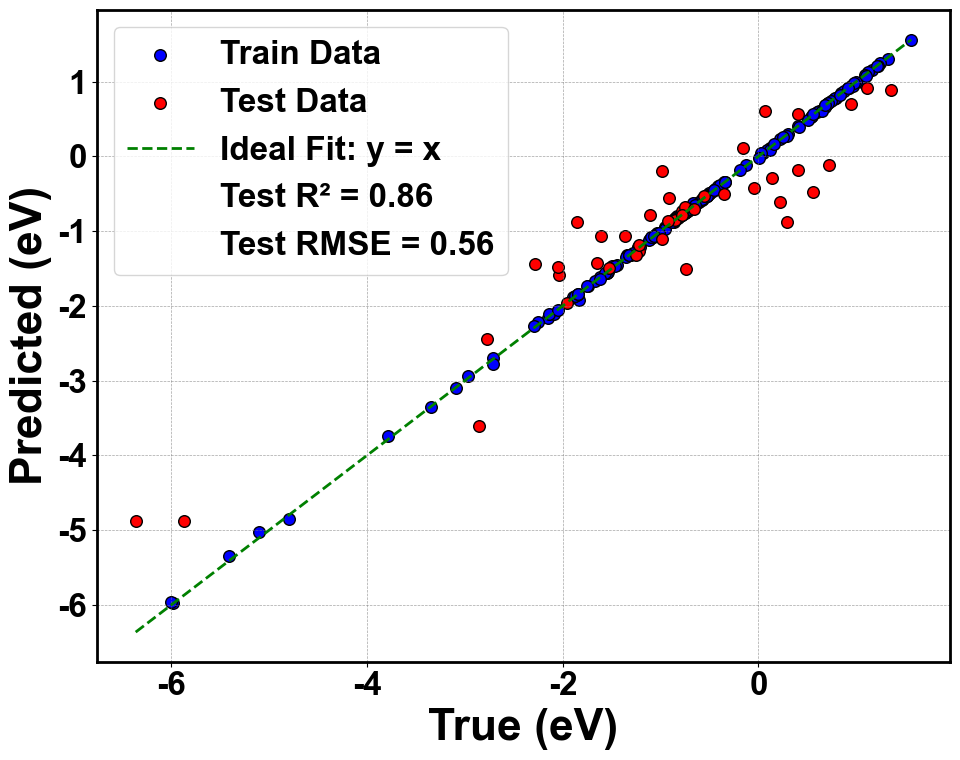

In [9]:
from numpy.random import RandomState


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=1)
# X_train, X_test, y_train, y_test = X0123, X4, y0123, y4
# model = RandomForestRegressor(n_estimators=100,random_state=42)
# model = XGBRegressor(max_depth=10, n_estimators=30,random_state=42)
# model = GradientBoostingRegressor(n_estimators=30,random_state=42)

# # Basic Linear Models
# model = LinearRegression()
# model = Ridge(alpha=1.0, random_state=42)
# model = Lasso(alpha=0.1, random_state=42)
# model = ElasticNet(alpha=0.1, l1_ratio=0.5, random_state=42)

# # Tree-based Models
# model = RandomForestRegressor(n_estimators=100, max_depth=None, random_state=42)
model = ExtraTreesRegressor(max_features=0.3, min_samples_split=3, n_estimators=179,
                    n_jobs=-1, random_state=40)
# model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
# model = AdaBoostRegressor(n_estimators=50, learning_rate=1.0, random_state=42)

# # Boosting Models
# model = XGBRegressor(n_estimators=100, learning_rate=0.2, max_depth=2, random_state=42)
# model = LGBMRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
# model = CatBoostRegressor(iterations=100, learning_rate=0.1, depth=3, random_seed=42, verbose=0)

# # Other Models
# model = SVR(kernel='rbf', C=1.0, epsilon=0.1)
# model = KNeighborsRegressor(n_neighbors=5, weights='uniform')
# model = RandomForestRegressor(
#         max_depth=15,             
#         n_estimators=500,         # 大量树提升稳定性
#         min_samples_split=2,      # 允许更细粒度分裂
#         min_samples_leaf=1,
#         warm_start=True,          # 支持增量训练（逐步增加n_estimators）
#         n_jobs=-1,
#     )
# models = [
#     ('xgb', XGBRegressor(max_depth=3, n_estimators=30)),
#     ('rf', RandomForestRegressor(n_estimators=30)),
#     ('gb', GradientBoostingRegressor(n_estimators=30))
# ]

# model = VotingRegressor(estimators=models)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_pred1 = model.predict(X_train)
test_mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
r1 = r2_score(y_train,y_pred1)
print(f"R2_test= {r2:.2f}")
print(f"R2_train= {r1:.2f}")
test_mse = mean_squared_error(y_test, y_pred)
train_mse = mean_squared_error(y_train, y_pred1)
print(f"RMSE_test: {np.sqrt(test_mse):.2f}")
print(f"RMSE_train: {np.sqrt(train_mse):.2f}")

plot_figure(y_train=y_train,y_test=y_test,y_pred=y_pred,y_pred1=y_pred1)


平均测试不确定性: 0.7462 eV
95%置信区间覆盖率: 100.00%


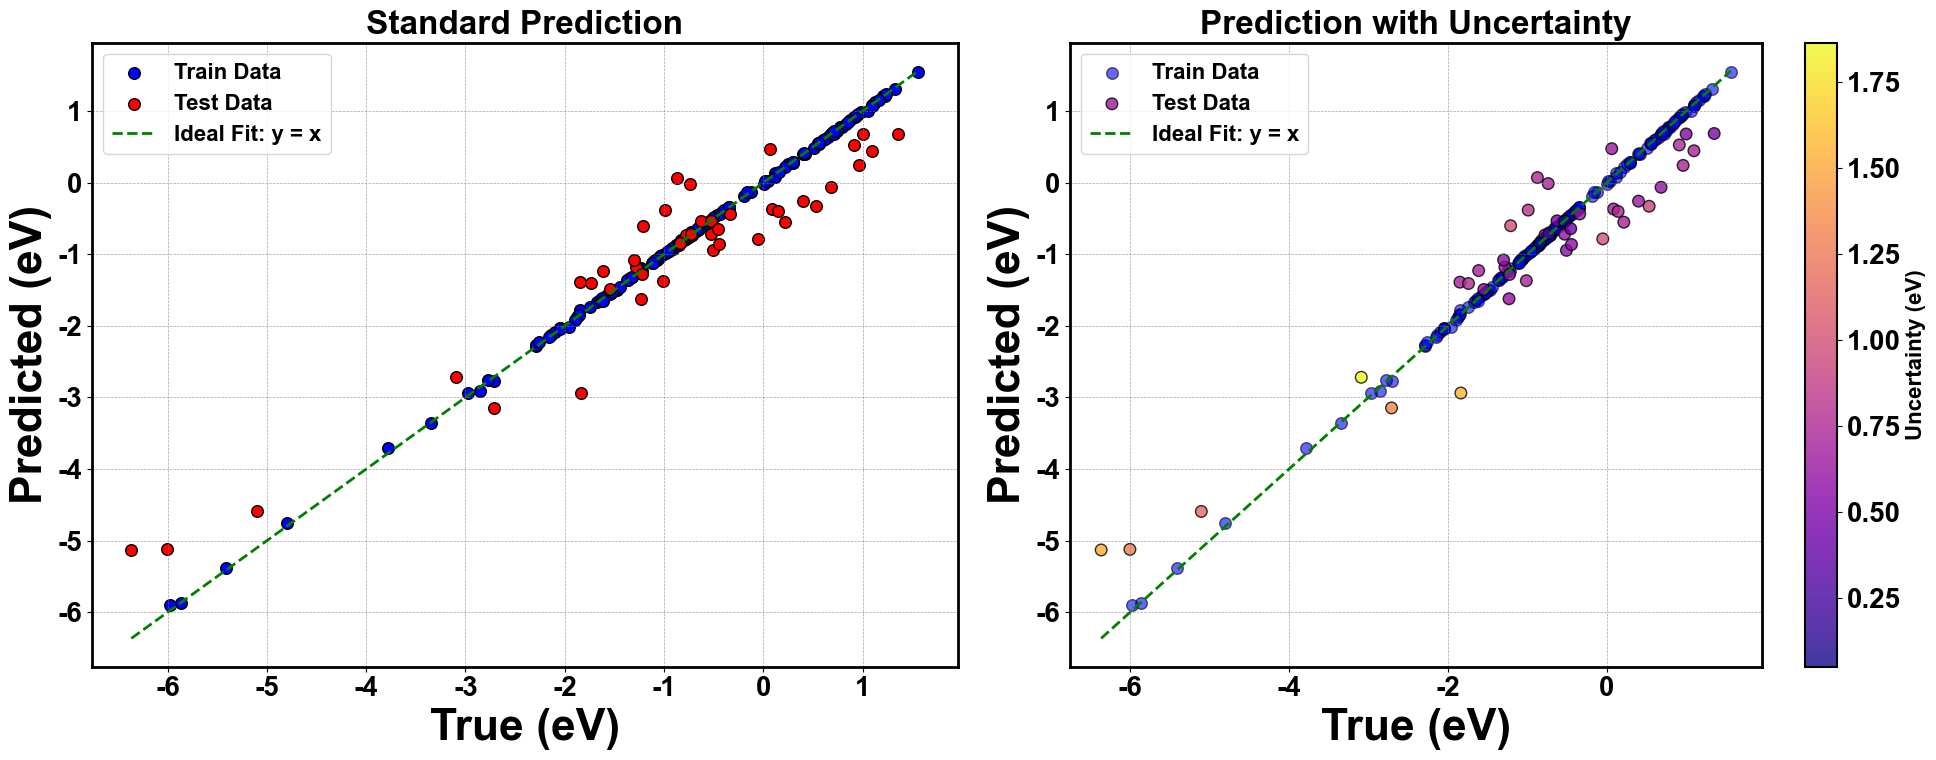

In [9]:
# 导入函数
from simple_uncertainty_integration import add_uncertainty_to_extratrees, plot_with_uncertainty

# 获取不确定性（在现有代码后添加）
test_predictions, test_uncertainties, test_intervals = add_uncertainty_to_extratrees(model, X_test)

# 打印不确定性信息
print(f"平均测试不确定性: {np.mean(test_uncertainties):.4f} eV")
coverage = np.mean((y_test >= test_intervals[0]) & (y_test <= test_intervals[1]))
print(f"95%置信区间覆盖率: {coverage:.2%}")

# 使用改进的可视化
plot_with_uncertainty(y_train, y_test, y_pred1, y_pred, test_uncertainties)

开始学习曲线分析...
生成学习曲线数据...


findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not

分析数据饱和度...
绘制分析图...


findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.



学习曲线分析结果
当前数据集大小: 168
当前性能: R² = 0.8348, RMSE = 0.5351 eV
预测双倍数据性能: R² = 0.9675 (+0.1326)
预测双倍数据性能: RMSE = 0.5164 eV (0.0187)
数据饱和状态: 未饱和

建议:
• 增加DFT数据点预期能提升性能
• 建议收集更多训练数据
• 目标改进是可能的


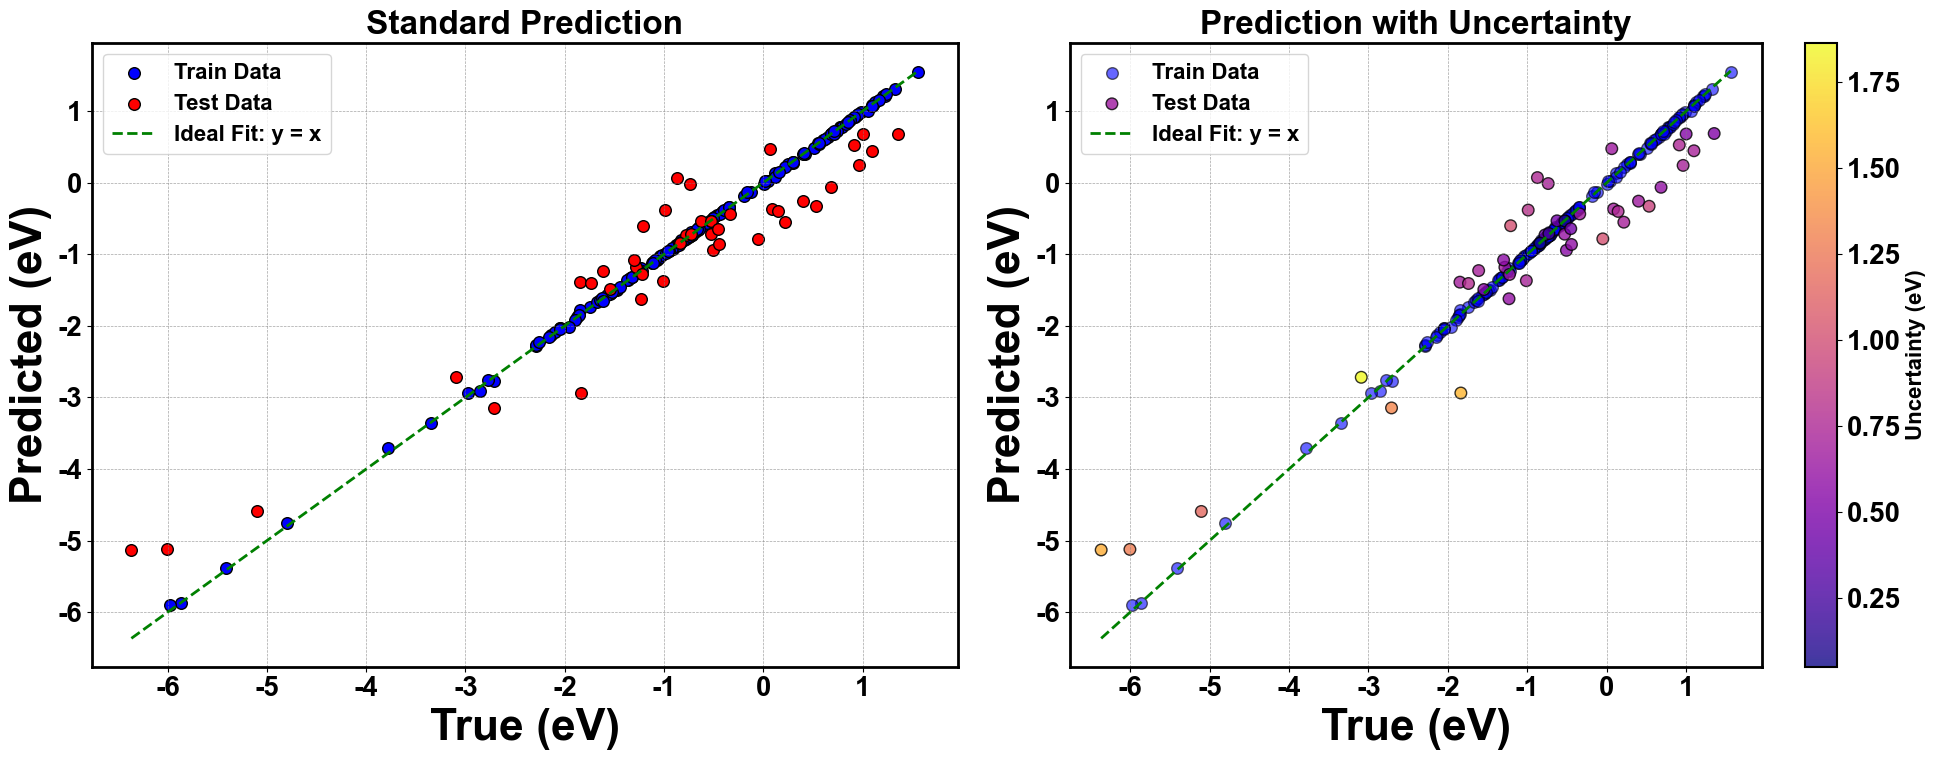

findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not

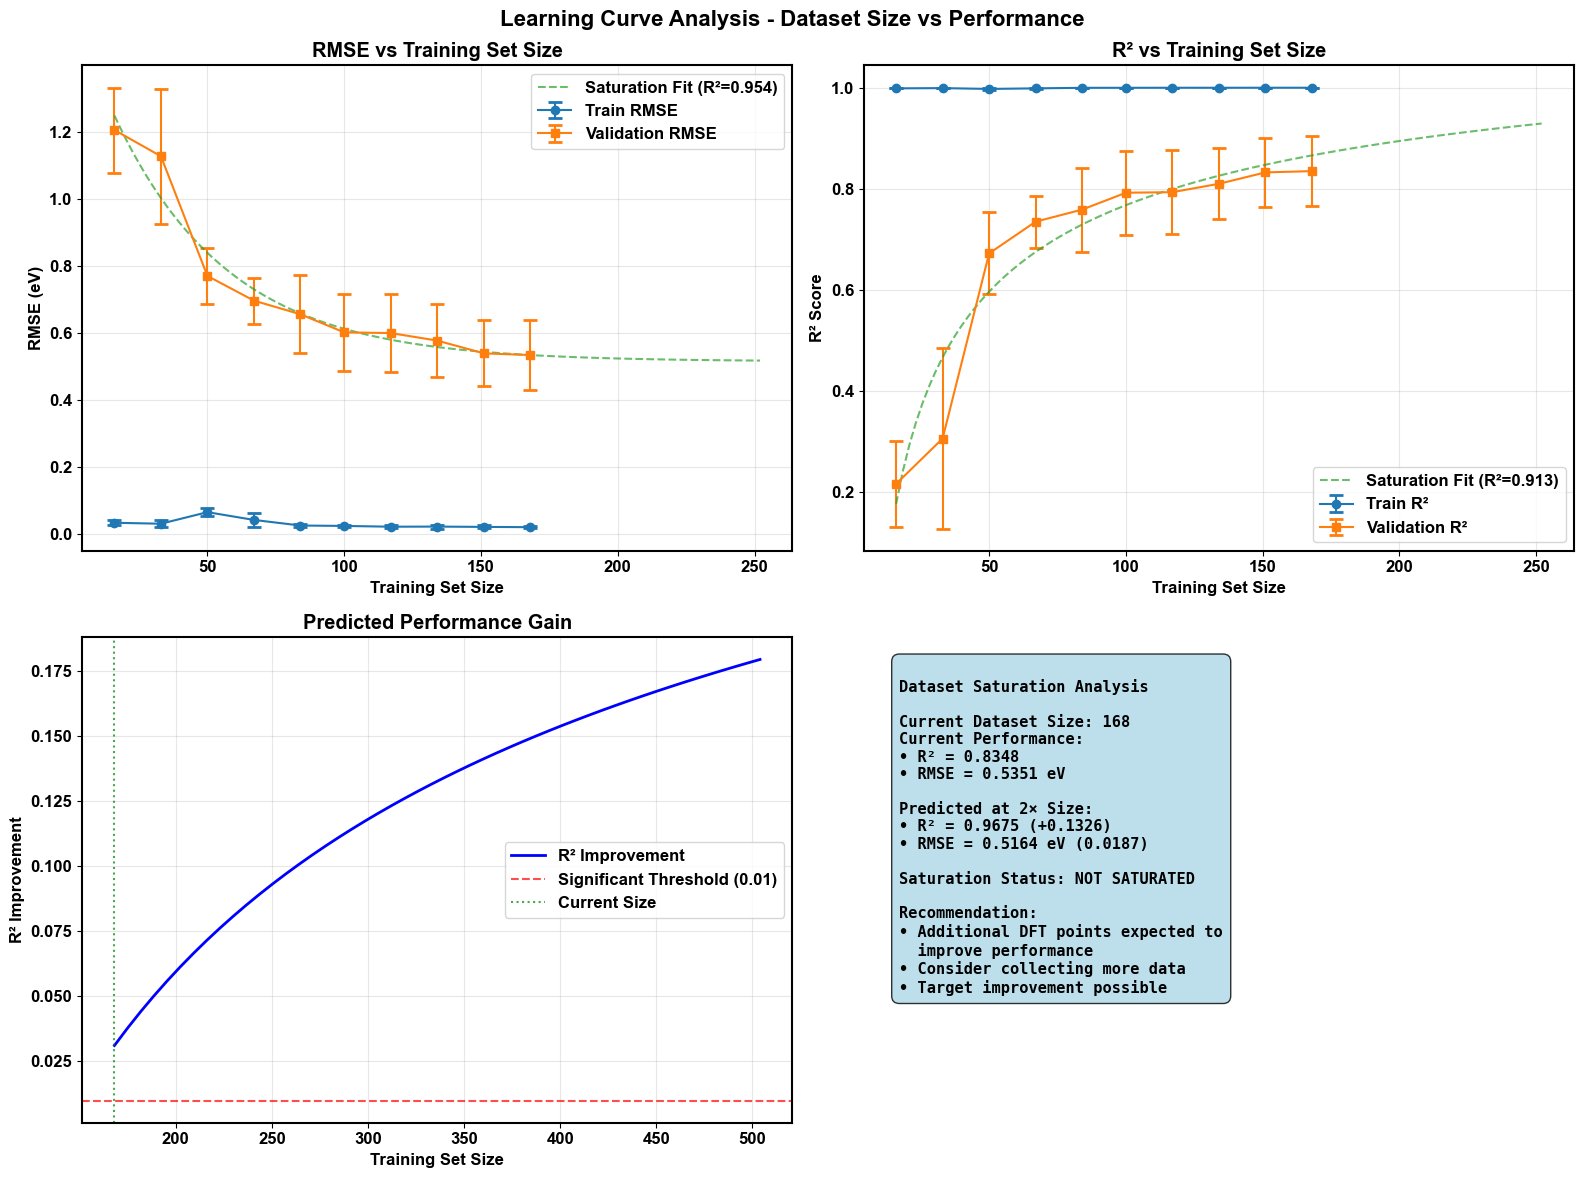

In [10]:
# 导入学习曲线分析工具
from learning_curve_analysis import quick_learning_curve_analysis

# 使用你的原始模型参数
model_params = {
    'max_features': 0.3,
    'min_samples_split': 3,
    'n_estimators': 179,
    'n_jobs': -1,
    'random_state': 42
}

# 一键运行完整分析（假设你已有数据X, y）
analyzer, analysis = quick_learning_curve_analysis(X, y, model_params=model_params)

正在训练 Linear Regression...
Linear Regression 训练完成. 测试集 R² = 0.6569, RMSE = 0.8320
正在训练 Ridge...
Ridge 训练完成. 测试集 R² = 0.7433, RMSE = 0.7197
正在训练 Lasso...
Lasso 训练完成. 测试集 R² = 0.8021, RMSE = 0.6319
正在训练 ElasticNet...
ElasticNet 训练完成. 测试集 R² = 0.8487, RMSE = 0.5525
正在训练 Random Forest...
Random Forest 训练完成. 测试集 R² = 0.7512, RMSE = 0.7085
正在训练 Extra Trees...
Extra Trees 训练完成. 测试集 R² = 0.8172, RMSE = 0.6074
正在训练 Gradient Boosting...
Gradient Boosting 训练完成. 测试集 R² = 0.7913, RMSE = 0.6490
正在训练 AdaBoost...
AdaBoost 训练完成. 测试集 R² = 0.7909, RMSE = 0.6496
正在训练 XGBoost...
XGBoost 训练完成. 测试集 R² = 0.8236, RMSE = 0.5966
正在训练 LightGBM...
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000476 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 15651
[LightGBM] [Info] Number of data points in the train set: 168, number of used features: 280
[LightGBM] [Info] Start training from score -0.761138
[LightGBM] [Warning] No further

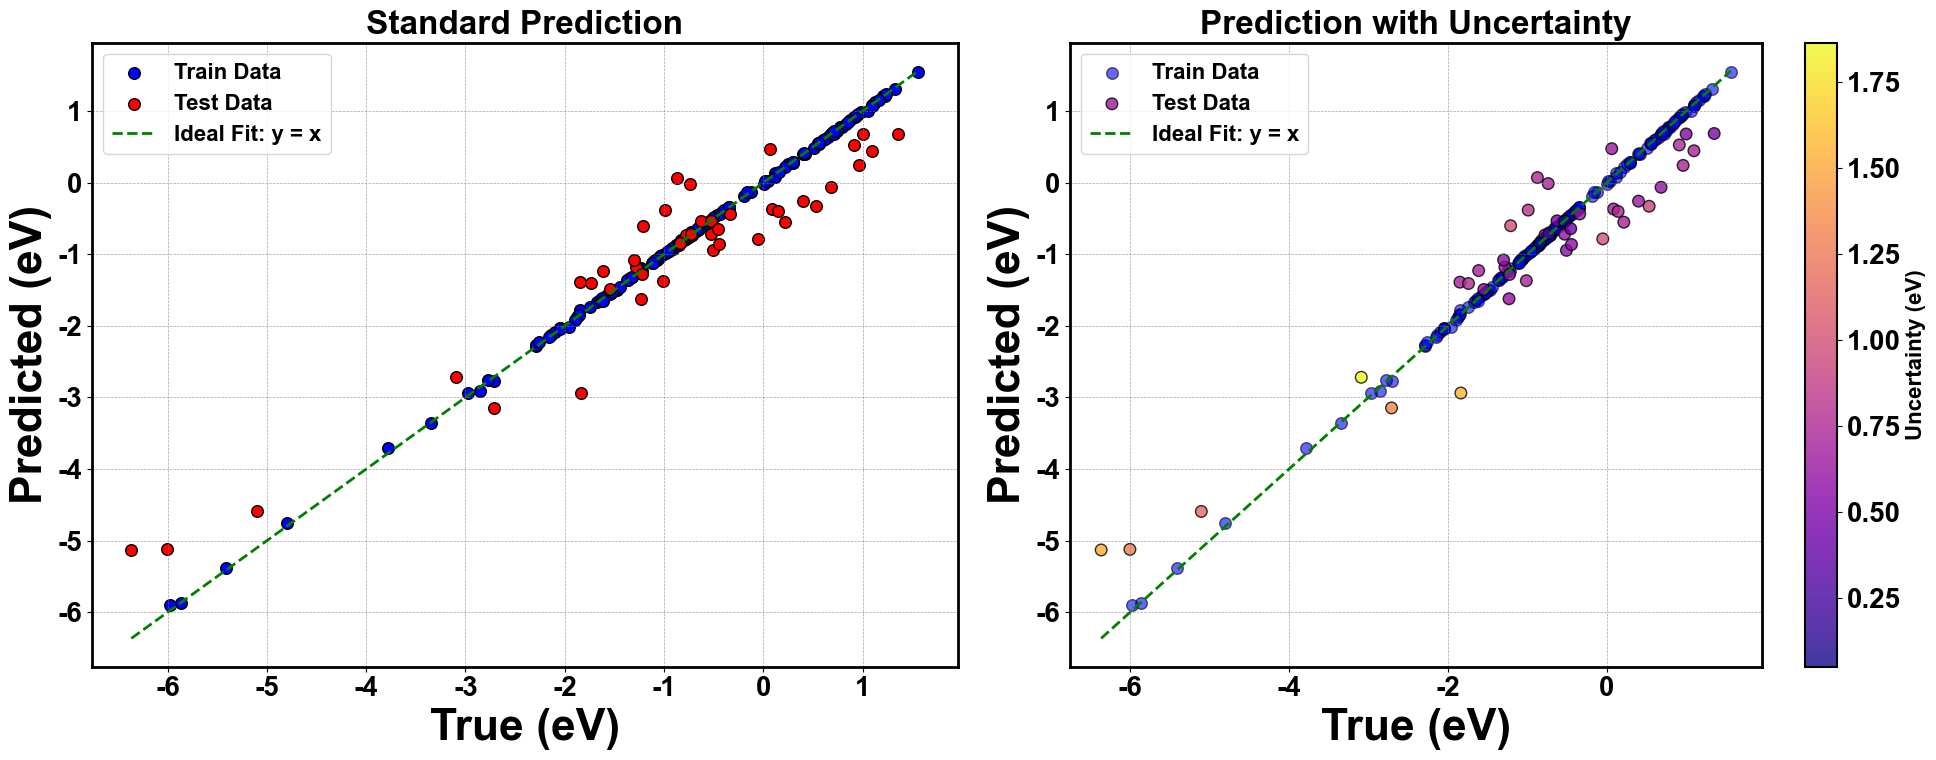

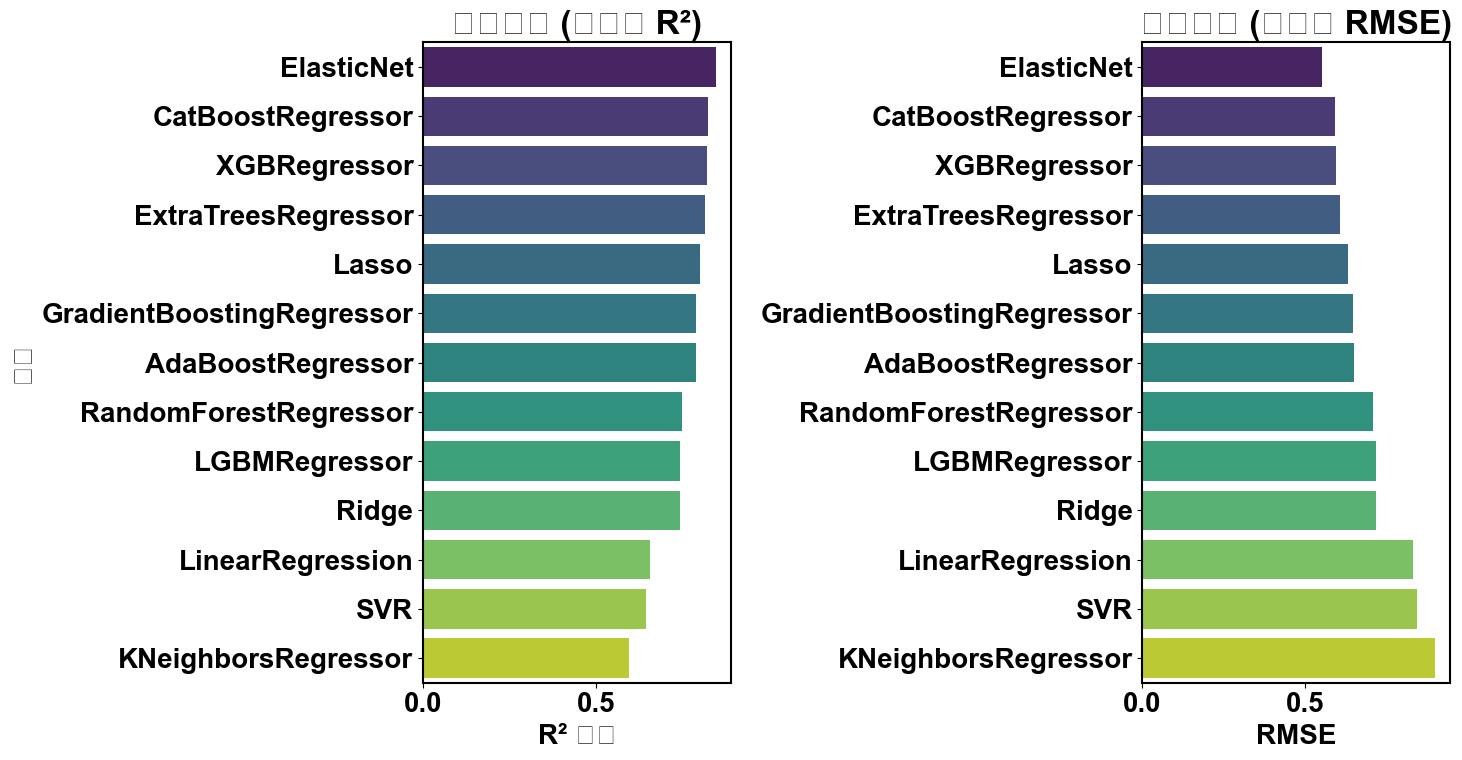


最佳模型: ElasticNet


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, GradientBoostingRegressor, AdaBoostRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.pipeline import Pipeline
import time
import warnings
warnings.filterwarnings('ignore')

# 1. 数据加载
data_path = '/Users/wukai/Desktop/project/w_git/data/fea/final/reduced_dataset_90pct.csv'
data = pd.read_csv(data_path)

# 2. 数据预处理
# 删除包含缺失值的行
data = data.dropna()

# 分离特征和目标变量
X = data.drop(['element', 'structure_type', 'H2_adsorption_energy'], axis=1)
y = data['H2_adsorption_energy']

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=50
)

# 3. 定义评估函数
def evaluate_model(model, X_train, X_test, y_train, y_test):
    # 记录开始时间
    start_time = time.time()
    
    # 训练模型
    model.fit(X_train, y_train)
    
    # 预测
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # 计算指标
    train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
    test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
    train_mae = mean_absolute_error(y_train, y_train_pred)
    test_mae = mean_absolute_error(y_test, y_test_pred)
    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)
    
    # 计算训练时间
    train_time = time.time() - start_time
    
    return {
        'model': model.__class__.__name__,
        'train_rmse': train_rmse,
        'test_rmse': test_rmse,
        'train_mae': train_mae,
        'test_mae': test_mae,
        'train_r2': train_r2,
        'test_r2': test_r2,
        'train_time': train_time
    }

# 4. 定义模型列表
models = [
    # 线性模型
    ('Linear Regression', LinearRegression()),
    ('Ridge', Ridge(alpha=1.0, random_state=42)),
    ('Lasso', Lasso(alpha=0.1, random_state=42)),
    ('ElasticNet', ElasticNet(alpha=0.1, l1_ratio=0.5, random_state=42)),
    
    # 树模型
    ('Random Forest', RandomForestRegressor(n_estimators=100, max_depth=None, random_state=42, n_jobs=-1)),
    ('Extra Trees', ExtraTreesRegressor(n_estimators=100, max_depth=None, random_state=42, n_jobs=-1)),
    ('Gradient Boosting', GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)),
    ('AdaBoost', AdaBoostRegressor(n_estimators=50, learning_rate=1.0, random_state=42)),
    
    # 其他集成模型
    ('XGBoost', XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42, n_jobs=-1)),
    ('LightGBM', LGBMRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42, n_jobs=-1)),
    ('CatBoost', CatBoostRegressor(iterations=100, learning_rate=0.1, depth=3, random_seed=42, verbose=0, thread_count=-1)),
    
    # 其他模型
    ('SVR', SVR(kernel='rbf', C=1.0, epsilon=0.1)),
    ('KNN', KNeighborsRegressor(n_neighbors=5, weights='uniform', n_jobs=-1))
]

# 5. 训练和评估所有模型
results = []
for name, model in models:
    print(f"正在训练 {name}...")
    try:
        result = evaluate_model(model, X_train, X_test, y_train, y_test)
        results.append(result)
        print(f"{name} 训练完成. 测试集 R² = {result['test_r2']:.4f}, RMSE = {result['test_rmse']:.4f}")
    except Exception as e:
        print(f"训练 {name} 时出错: {str(e)}")
        continue

# 6. 结果展示
results_df = pd.DataFrame(results)
results_df = results_df.sort_values('test_r2', ascending=False)
print("\n模型性能比较 (按测试集 R² 排序):")
print(results_df[['model', 'test_r2', 'test_rmse', 'test_mae', 'train_time']].to_string(index=False))

# 7. 可视化结果
plt.figure(figsize=(15, 8))

# 绘制 R² 比较图
plt.subplot(1, 2, 1)
sns.barplot(x='test_r2', y='model', data=results_df, palette='viridis')
plt.title('模型比较 (测试集 R²)')
plt.xlabel('R² 分数')
plt.ylabel('模型')

# 绘制 RMSE 比较图
plt.subplot(1, 2, 2)
sns.barplot(x='test_rmse', y='model', data=results_df, palette='viridis')
plt.title('模型比较 (测试集 RMSE)')
plt.xlabel('RMSE')
plt.ylabel('')

plt.tight_layout()
plt.show()

# 8. 最佳模型分析
best_model_name = results_df.iloc[0]['model']
best_model = next((model for name, model in models if name == best_model_name), None)

print(f"\n最佳模型: {best_model_name}")

# 9. 特征重要性分析 (如果模型支持)
if hasattr(best_model, 'feature_importances_'):
    feature_importance = pd.DataFrame({
        'feature': X.columns,
        'importance': best_model.feature_importances_
    }).sort_values('importance', ascending=False)
    
    plt.figure(figsize=(12, 8))
    sns.barplot(x='importance', y='feature', data=feature_importance.head(20), palette='viridis')
    plt.title(f'{best_model_name} - fea importance (Top 20)')
    plt.xlabel('importance', fontsize=28)
    plt.ylabel('feature', fontsize=28)
    plt.show()
    
    print("\n最重要的特征:")
    print(feature_importance.head(10).to_string(index=False))

Feature Importance Comparison:
             Feature  MDI_Importance  Permutation_Importance
85   M-2H_M_H_Ce_PC3        0.049676            3.656997e-02
56      M_M_O_Ce_PC4        0.045640            3.199819e-02
45       M_M_O_O_PC1        0.026749            3.645827e-02
96    M-2H_M_O_O_PC7        0.026256            2.503145e-02
37    M-H_M_O_Ce_PC4        0.024853            4.091056e-02
81    M-2H_M_H_M_PC1        0.024788            3.946003e-02
90    M-2H_M_O_O_PC1        0.023874            1.202408e-02
69    M-2H_M_H_O_PC1        0.021898            1.295987e-02
4    Covalent_Radius        0.021547            2.005599e-02
26     M-H_M_O_O_PC1        0.021043            8.758879e-03
18     M-H_M_H_O_PC8        0.020852            2.706717e-02
93    M-2H_M_O_O_PC4        0.020488            2.375328e-02
58       M_M_M_M_PC1        0.019739           -6.661338e-17
103  M-2H_M_O_Ce_PC5        0.017528            3.052233e-02
77    M-2H_M_H_O_PC9        0.017354            2.5457

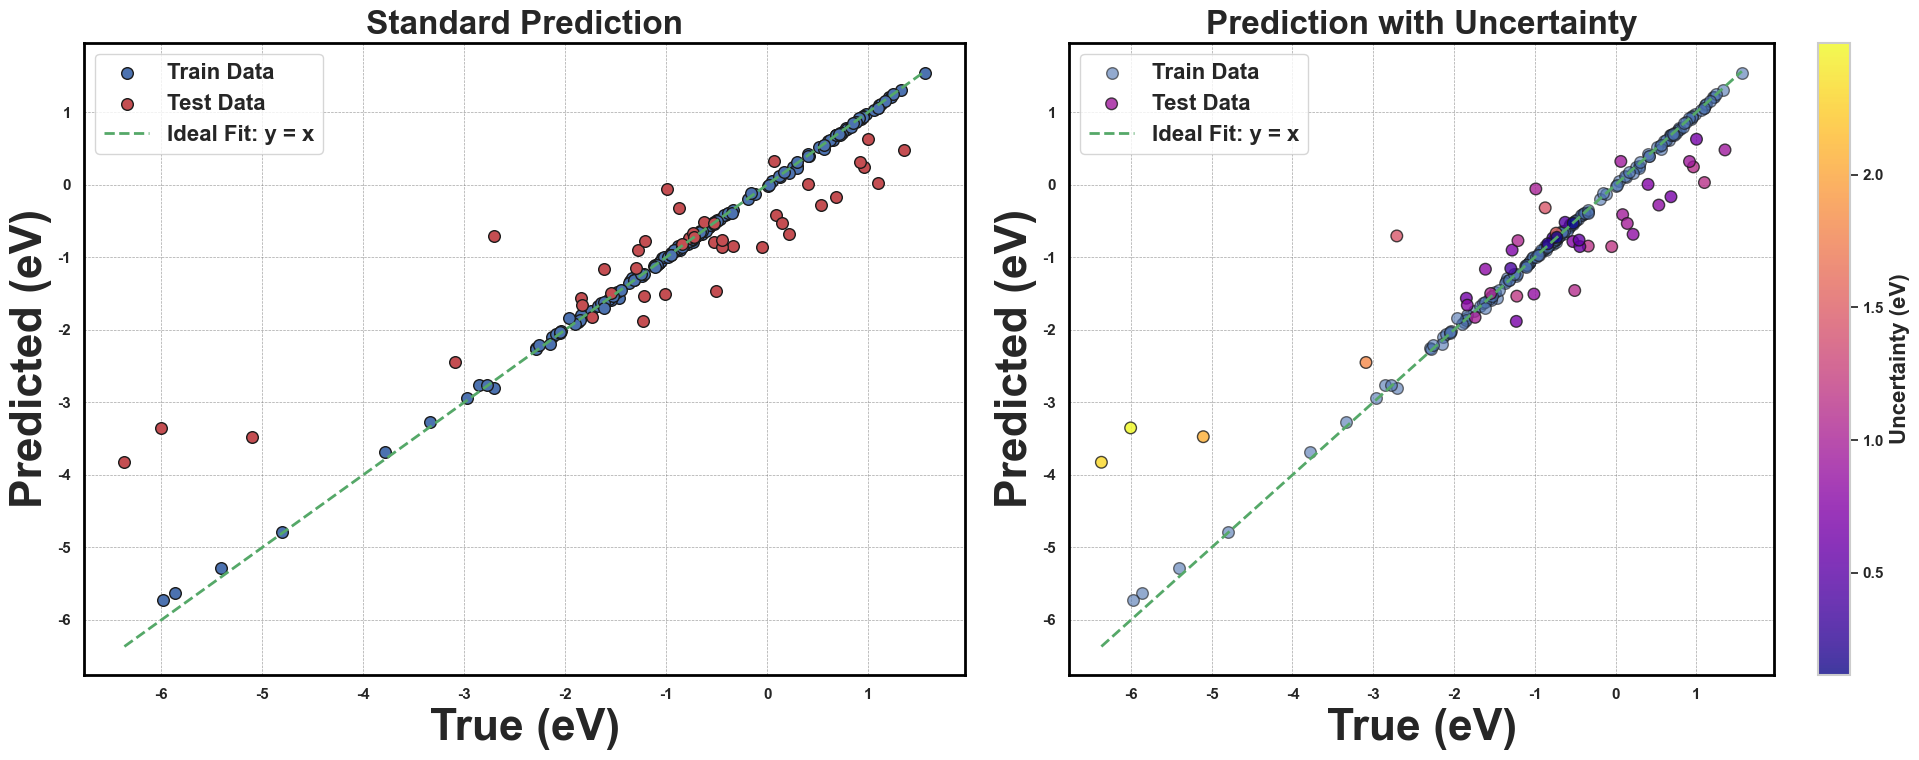

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x1000 with 0 Axes>

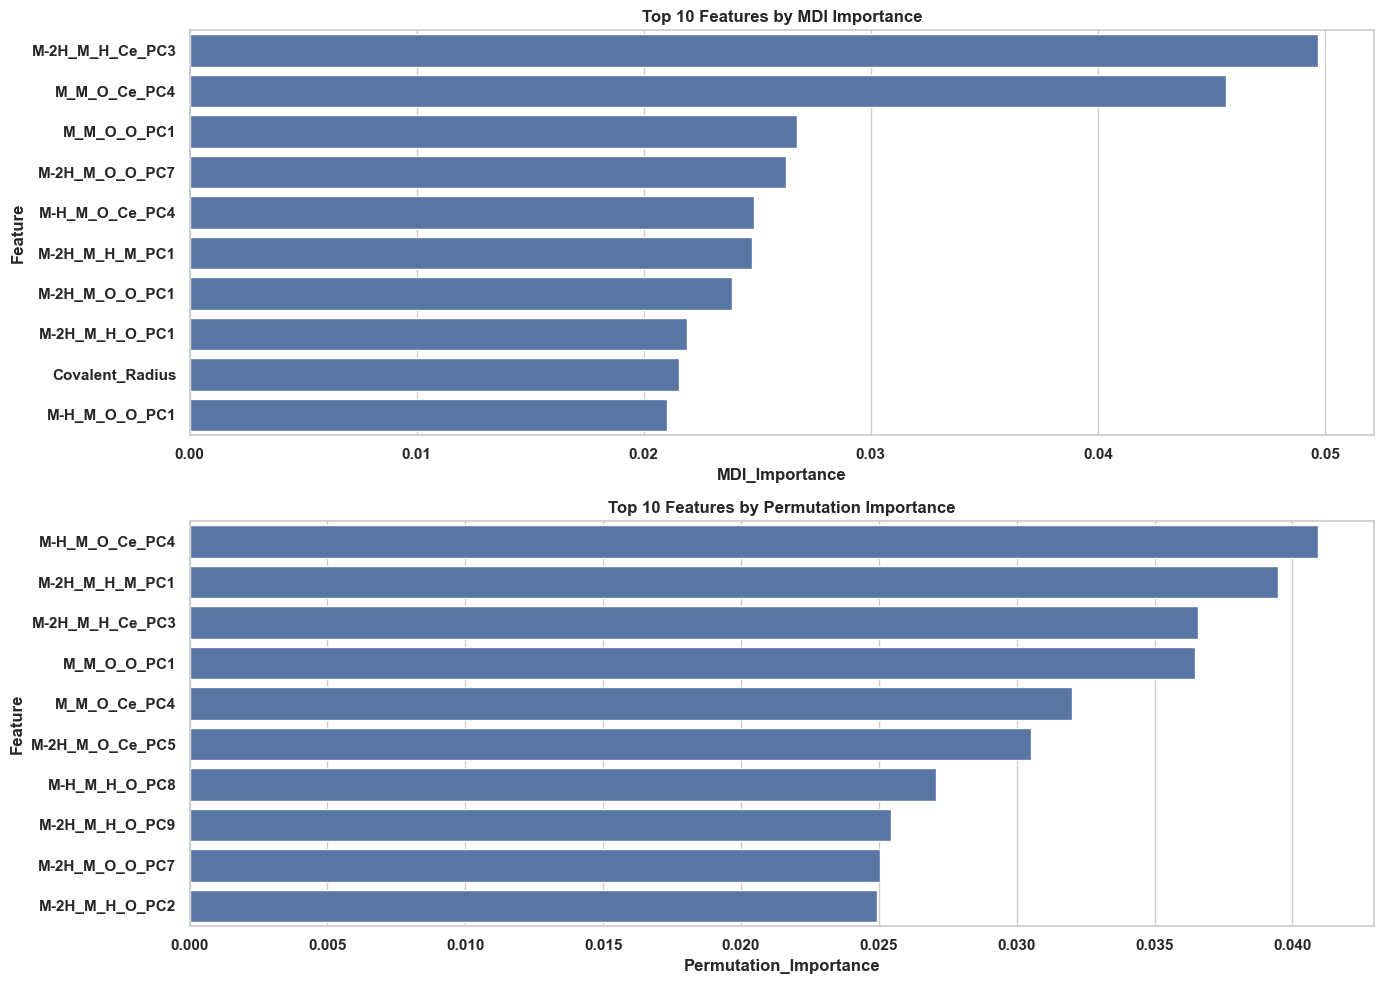

In [23]:
# 比较不同的特征重要性方法
from sklearn.inspection import permutation_importance

# 1. 内置特征重要性
feature_importances = model.feature_importances_

# 2. 置换特征重要性
result = permutation_importance(
    model, X_test, y_test, n_repeats=10, random_state=42, n_jobs=-1
)
perm_importance_mean = result.importances_mean

# 创建比较DataFrame
comparison_df = pd.DataFrame({
    'Feature': X.columns,
    'MDI_Importance': feature_importances,
    'Permutation_Importance': perm_importance_mean
})

# 按MDI重要性降序排列
comparison_df = comparison_df.sort_values('MDI_Importance', ascending=False)

# 打印比较结果
print("Feature Importance Comparison:")
print(comparison_df.head(20))

# 可视化比较 (前10个特征)
plt.figure(figsize=(14, 10))

plt.subplot(2, 1, 1)
sns.barplot(x='MDI_Importance', y='Feature', data=comparison_df.head(10))
plt.title('Top 10 Features by MDI Importance')

plt.subplot(2, 1, 2)
# 按置换重要性重新排序
perm_sorted = comparison_df.sort_values('Permutation_Importance', ascending=False)
sns.barplot(x='Permutation_Importance', y='Feature', data=perm_sorted.head(10))
plt.title('Top 10 Features by Permutation Importance')

plt.tight_layout()
plt.show()

In [24]:
# 导入必要的库
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# 设置中文字体（可选）并调整图像尺寸和风格
plt.rcParams['font.sans-serif'] = ['SimHei', 'STHeiti', 'Arial Unicode MS']
plt.rcParams['axes.unicode_minus'] = False
sns.set(style="whitegrid")

# 为两个特征分别创建概率密度分布图
def plot_feature_density_by_structure(data0, data1, data2, data3, data4, feature_name, output_dir=None):
    """
    为指定特征绘制按结构分组的概率密度分布图
    
    参数:
    data0-4: 不同结构类型的数据框
    feature_name: 要绘制的特征名称
    output_dir: 输出目录，若为None则只显示不保存
    """
    plt.figure(figsize=(12, 8))
    
    # 检查所有数据框中是否存在该特征
    if feature_name not in data0.columns:
        print(f"错误: 特征 '{feature_name}' 不在数据集中")
        return
    
    # 为每种结构类型绘制密度曲线
    sns.kdeplot(data0[feature_name], label='pristine', shade=True, alpha=0.7)
    sns.kdeplot(data1[feature_name], label='Ov-surf1', shade=True, alpha=0.7)
    sns.kdeplot(data2[feature_name], label='Ov-surf2', shade=True, alpha=0.7)
    sns.kdeplot(data3[feature_name], label='Ov-sub1', shade=True, alpha=0.7)
    sns.kdeplot(data4[feature_name], label='Ov-sub2', shade=True, alpha=0.7)
    
    # 添加标题和标签
    plt.title(f'{feature_name}', fontsize=28)
    plt.xlabel(f'{feature_name} Value', fontsize=30)
    plt.ylabel('Density', fontsize=30)
    plt.legend(title='Structure Type', fontsize=22, title_fontsize=24)
    
    # 设置坐标轴刻度大小
    plt.tick_params(axis='x', labelsize=20, width=2.0, length=6)
    plt.tick_params(axis='y', labelsize=20, width=2.0, length=6)
    # 添加网格线以提高可读性
    plt.grid(True, alpha=0.3)
    
    plt.tight_layout()
    
    # 保存或显示图表
    if output_dir:
        import os
        os.makedirs(output_dir, exist_ok=True)
        safe_feature_name = feature_name.replace('/', '_').replace(' ', '_')
        plt.savefig(f"{output_dir}/{safe_feature_name}_density_by_structure.png", dpi=300, bbox_inches='tight')
        print(f"已保存图表到: {output_dir}/{safe_feature_name}_density_by_structure.png")
    else:
        plt.show()

# 绘制第一个特征的分布图
plot_feature_density_by_structure(data0, data1, data2, data3, data4, 
                                  'M-2H_H_O_Ce_atom0_PC1', 
                                  output_dir='/Users/wukai/Desktop/project/w_git/reports/figures/feature_analysis')

# 绘制第二个特征的分布图
plot_feature_density_by_structure(data0, data1, data2, data3, data4, 
                                  'M-2H_H_O_O_atom0_PC1', 
                                  output_dir='/Users/wukai/Desktop/project/w_git/reports/figures/feature_analysis')

# 可选：同时在一个图中绘制两个特征的散点图，按结构类型着色
plt.figure(figsize=(12, 10))
# 合并所有数据以便使用seaborn的散点图
all_data = pd.concat([
    data0.assign(structure='pristine'),
    data1.assign(structure='Ov-surf1'),
    data2.assign(structure='Ov-surf2'),
    data3.assign(structure='Ov-sub1'),
    data4.assign(structure='Ov-sub2')
])

# 绘制散点图
sns.scatterplot(
    x='M-2H_H_O_Ce_atom0_PC1', 
    y='M-2H_H_O_O_atom0_PC1', 
    hue='structure',
    palette='viridis',
    s=100,  # 点的大小
    alpha=0.7,  # 透明度
    data=all_data
)

plt.title('Relationship between M-2H_H_O_Ce_atom0_PC1 and M-2H_H_O_O_atom0_PC1', fontsize=36)
plt.xlabel('M-2H_H_O_Ce_atom0_PC1', fontsize=22)
plt.ylabel('M-2H_H_O_O_atom0_PC1', fontsize=22)
plt.legend(title='Structure Type', fontsize=22, title_fontsize=22)
plt.grid(True, alpha=0.3)
plt.tight_layout()

# 保存或显示图表
output_dir='/Users/wukai/Desktop/project/w_git/reports/figures/feature_analysis'
import os
os.makedirs(output_dir, exist_ok=True)
plt.savefig(f"{output_dir}/Ce_O_PC1_relationship.png", dpi=300, bbox_inches='tight')
print(f"已保存关系图到: {output_dir}/Ce_O_PC1_relationship.png")

错误: 特征 'M-2H_H_O_Ce_atom0_PC1' 不在数据集中
错误: 特征 'M-2H_H_O_O_atom0_PC1' 不在数据集中


ValueError: Could not interpret value `M-2H_H_O_Ce_atom0_PC1` for `x`. An entry with this name does not appear in `data`.

In [41]:
R2_trains=[]
R2_tests=[]
RMSE_trains=[]
RMSE_tests=[]
for i in range(1,100):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=i)
    # X_train, X_test, y_train, y_test = X0123,X4,y0123,y4
    # models = [
    #     ('xgb', XGBRegressor(max_depth=3, n_estimators=40)),
    #     ('rf', RandomForestRegressor(n_estimators=40)),
    #     ('gb', GradientBoostingRegressor(n_estimators=40))
    # ]

    # model = VotingRegressor(estimators=models)
    # X_train, X_test, y_train, y_test = train_test_split(X_Ov1_Fir, y_Ov1_Fir, test_size=0.3, random_state=i)
    # X01 = pd.concat([X3,X4,X0,X1, X_train], axis=0, ignore_index=True)
    # y01 = pd.concat([y3,y4,y0,y1, y_train], axis=0, ignore_index=True)
    # X_train,y_train=X01,y01
    # model = RandomForestRegressor(
    #     max_depth=15,             
    #     n_estimators=500,         # 大量树提升稳定性
    #     min_samples_split=2,      # 允许更细粒度分裂
    #     min_samples_leaf=1,
    #     warm_start=True,          # 支持增量训练（逐步增加n_estimators）
    #     n_jobs=-1,
    # )
    model = ExtraTreesRegressor(max_features=0.3, min_samples_split=3, n_estimators=179,
                    n_jobs=-1, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_pred1 = model.predict(X_train)
    r2 = r2_score(y_test, y_pred)
    r1 = r2_score(y_train,y_pred1)
    print("R2_test= ",r2)
    print("R2_train= ",r1)
    test_mse = mean_squared_error(y_test, y_pred)
    train_mse = mean_squared_error(y_train, y_pred1)
    print("Test Set RMSE_test:", np.sqrt(test_mse))
    print("Test Set RMSE_train:", np.sqrt(train_mse))
    R2_tests.append(r2)
    R2_trains.append(r1)
    RMSE_trains.append(np.sqrt(train_mse))
    RMSE_tests.append(np.sqrt(test_mse))

R2_test=  0.8684163727491517
R2_train=  0.9998005950245124
Test Set RMSE_test: 0.5518884666358784
Test Set RMSE_train: 0.018791303603830512
R2_test=  0.8884537901778307
R2_train=  0.9996985676618166
Test Set RMSE_test: 0.4738238844563561
Test Set RMSE_train: 0.023707035749463402
R2_test=  0.8515041656783268
R2_train=  0.9996667874791286
Test Set RMSE_test: 0.5708144090988939
Test Set RMSE_train: 0.024520089166337973
R2_test=  0.8635135332012459
R2_train=  0.9997152758060605
Test Set RMSE_test: 0.5489385436087977
Test Set RMSE_train: 0.02274538860550515
R2_test=  0.8775519058068026
R2_train=  0.9998179903567387
Test Set RMSE_test: 0.4675866980056482
Test Set RMSE_train: 0.018711939615354785
R2_test=  0.8861040554164864
R2_train=  0.999787827211941
Test Set RMSE_test: 0.49664606582964893
Test Set RMSE_train: 0.01969896094597254
R2_test=  0.8851795773973319
R2_train=  0.9997294800443869
Test Set RMSE_test: 0.41690245948676885
Test Set RMSE_train: 0.023209669493607695
R2_test=  0.811091257

In [42]:
print(f"{np.mean(R2_trains):.4f} {np.mean(RMSE_trains):.4f} {np.mean(R2_tests):.4f} {np.mean(RMSE_tests):.4f}")

0.9997 0.0219 0.8390 0.5231


<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x1000 with 0 Axes>

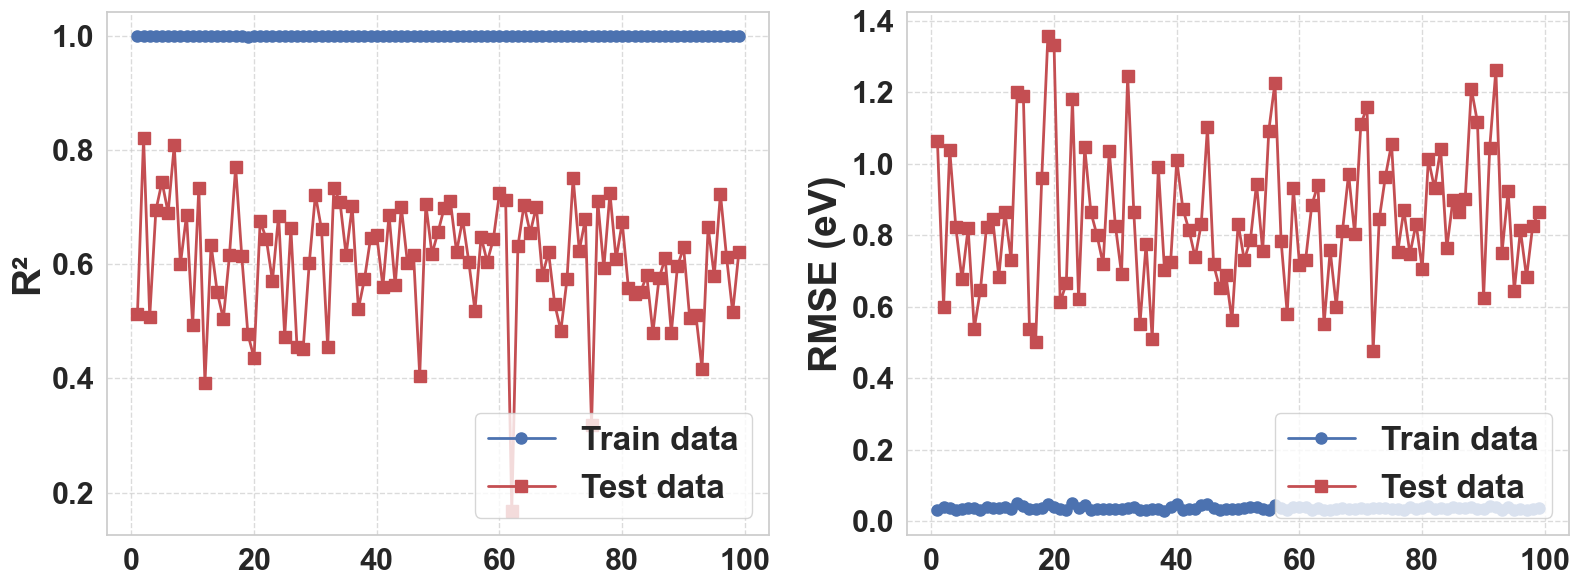

In [27]:
def plot_metrics_comparison(r2_train, r2_test, rmse_train, rmse_test, save_path=None):
    """
    绘制训练集和测试集的R2和RMSE折线图
    
    参数:
        r2_train (list): 训练集R2值列表
        r2_test (list): 测试集R2值列表
        rmse_train (list): 训练集RMSE值列表
        rmse_test (list): 测试集RMSE值列表
        save_path (str, optional): 图片保存路径，如果为None则不保存
    """
    # 创建图形和子图
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
    
    # 生成x轴数据
    epochs = np.arange(1, len(r2_train) + 1)
    
    # 绘制R2曲线
    ax1.plot(epochs, r2_train, 'o-', label='Train data', color='b', linewidth=2, markersize=8)
    ax1.plot(epochs, r2_test, 's-', label='Test data', color='r', linewidth=2, markersize=8)
    ax1.set_xlabel('', fontsize=28)
    ax1.set_ylabel('R²', fontsize=28)
    ax1.set_title('', fontsize=28, fontweight='bold')
    ax1.grid(True, linestyle='--', alpha=0.7)
    ax1.legend(fontsize=24,loc='lower right')

    # 设置刻度标签字体大小
    ax1.tick_params(axis='both', which='major', labelsize=22)
    ax1.tick_params(axis='both', which='minor', labelsize=22)
    
    # 绘制RMSE曲线
    ax2.plot(epochs, rmse_train, 'o-', label='Train data', color='b', linewidth=2, markersize=8)
    ax2.plot(epochs, rmse_test, 's-', label='Test data', color='r', linewidth=2, markersize=8)
    ax2.set_xlabel('', fontsize=28)
    ax2.set_ylabel('RMSE (eV)', fontsize=28)
    ax2.set_title('', fontsize=28, fontweight='bold')
    ax2.grid(True, linestyle='--', alpha=0.7)
    ax2.legend(fontsize=24,loc='lower right')
    
    # 设置刻度标签字体大小
    ax2.tick_params(axis='both', which='major', labelsize=22)
    ax2.tick_params(axis='both', which='minor', labelsize=22)
    
    # 调整布局
    plt.tight_layout()
    
    # 保存图片
    if save_path:
        plt.savefig(save_path, dpi=600, bbox_inches='tight')
        print(f'图片已保存至: {save_path}')
    
    plt.show()

plot_metrics_comparison(
    r2_train=R2_trains,
    r2_test=R2_tests,
    rmse_train=RMSE_trains,
    rmse_test=RMSE_tests,
)

In [ ]:
# 导入必要的库
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import os

def perform_loso_cv(data, target_col='H2_adsorption_energy', structure_col='structure_type', 
                   top_n_features=None, output_dir=None):
    """
    执行留一结构交叉验证 (Leave-One-Structure-Out Cross-Validation)
    
    参数:
    data: 包含特征、目标变量和结构标识的DataFrame
    target_col: 目标变量列名
    structure_col: 结构类型列名
    top_n_features: 使用的特征数量，如果为None则使用所有特征
    output_dir: 图表输出目录
    
    返回:
    结构性能字典
    """
    # 检查数据中是否包含所有需要的列
    if target_col not in data.columns:
        print(f"错误: 目标列 '{target_col}' 不在数据集中")
        return None
    if structure_col not in data.columns:
        print(f"错误: 结构列 '{structure_col}' 不在数据集中")
        return None
    
    # 获取所有结构类型
    structures = data[structure_col].unique()
    print(f"执行留一结构交叉验证，共{len(structures)}种结构: {', '.join(structures)}")
    
    # 准备特征和目标
    # 排除非特征列
    non_feature_cols = [structure_col, target_col]
    non_feature_cols.extend([col for col in data.columns if col in [
        'element', 'Electronegativity', 'First_Ionization_Energy', 'Second_Ionization_Energy',
        'Atomic_Radius', 'Covalent_Radius', 'Period', 'Group', 'Valence_Electrons', 'Electron_Shells',
        'M_energy', 'M2H_energy'
    ]])
    
    feature_cols = [col for col in data.columns if col not in non_feature_cols]
    
    # 如果指定了特征数量，使用特征重要性选择特征
    if top_n_features and top_n_features < len(feature_cols):
        # 训练一个模型获取特征重要性
        X_all = data[feature_cols]
        y_all = data[target_col]
        
        forest = ExtraTreesRegressor(n_estimators=100, random_state=42)
        forest.fit(X_all, y_all)
        
        # 选择最重要的特征
        importances = forest.feature_importances_
        indices = np.argsort(importances)[::-1]
        
        selected_features = [feature_cols[i] for i in indices[:top_n_features]]
        print(f"已选择{len(selected_features)}个最重要的特征")
        feature_cols = selected_features
    
    # 存储每个结构的性能
    structure_performance = {}
    all_predictions = []
    all_actual = []
    
    # 对每个结构进行留一结构测试
    for test_structure in structures:
        print(f"\n测试结构: {test_structure}")
        
        # 分割数据为训练集和测试集
        test_mask = data[structure_col] == test_structure
        train_mask = ~test_mask
        
        X_train = data.loc[train_mask, feature_cols]
        y_train = data.loc[train_mask, target_col]
        X_test = data.loc[test_mask, feature_cols]
        y_test = data.loc[test_mask, target_col]
        
        print(f"训练集大小: {len(X_train)}, 测试集大小: {len(X_test)}")
        
        # 特征标准化
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)
        
        # 训练模型
        model = ExtraTreesRegressor(n_estimators=100, random_state=42)
        model.fit(X_train_scaled, y_train)
        
        # 预测
        y_pred = model.predict(X_test_scaled)
        
        # 性能指标
        mse = mean_squared_error(y_test, y_pred)
        rmse = np.sqrt(mse)
        mae = mean_absolute_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)
        
        # 存储性能
        structure_performance[test_structure] = {
            'RMSE': rmse,
            'MAE': mae,
            'R2': r2,
            'n_samples': len(X_test),
            'y_test': y_test.values,
            'y_pred': y_pred
        }
        
        # 将结果添加到总列表中
        all_predictions.extend(y_pred)
        all_actual.extend(y_test.values)
        
        print(f"RMSE: {rmse:.4f}, MAE: {mae:.4f}, R²: {r2:.4f}")
    
    # 计算整体性能
    overall_rmse = np.sqrt(mean_squared_error(all_actual, all_predictions))
    overall_mae = mean_absolute_error(all_actual, all_predictions)
    overall_r2 = r2_score(all_actual, all_predictions)
    
    print("\n整体性能:")
    print(f"RMSE: {overall_rmse:.4f}, MAE: {overall_mae:.4f}, R²: {overall_r2:.4f}")
    
    # 绘制性能图表
    plot_structure_performance(structure_performance, output_dir)
    
    # 绘制实际值vs预测值散点图
    plot_actual_vs_predicted(structure_performance, output_dir)
    
    return structure_performance

def plot_structure_performance(structure_performance, output_dir=None):
    """绘制每个结构的RMSE和R2性能图"""
    structures = list(structure_performance.keys())
    rmse_values = [structure_performance[s]['RMSE'] for s in structures]
    r2_values = [structure_performance[s]['R2'] for s in structures]
    
    # 设置中文字体并调整图像风格
    plt.rcParams['font.sans-serif'] = ['SimHei', 'STHeiti', 'Arial Unicode MS']
    plt.rcParams['axes.unicode_minus'] = False
    
    # 创建图形
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))
    
    # RMSE 条形图
    sns.barplot(x=structures, y=rmse_values, ax=ax1, palette='viridis', hue=structures, legend=False)
    ax1.set_title('RMSE by Structure Type', fontsize=24, fontweight='bold')
    ax1.set_xlabel('Structure Type', fontsize=20, fontweight='bold')
    ax1.set_ylabel('RMSE', fontsize=20, fontweight='bold')
    ax1.tick_params(axis='both', which='major', labelsize=16, width=2.5, length=10)
    for spine in ax1.spines.values():
        spine.set_linewidth(2.5)
    
    # 添加数值标签
    for i, v in enumerate(rmse_values):
        ax1.text(i, v + 0.02, f'{v:.4f}', ha='center', fontsize=14)
    
    # R2 条形图
    sns.barplot(x=structures, y=r2_values, ax=ax2, palette='viridis', hue=structures, legend=False)
    ax2.set_title('R² by Structure Type', fontsize=24, fontweight='bold')
    ax2.set_xlabel('Structure Type', fontsize=20, fontweight='bold')
    ax2.set_ylabel('R²', fontsize=20, fontweight='bold')
    ax2.tick_params(axis='both', which='major', labelsize=16, width=2.5, length=10)
    for spine in ax2.spines.values():
        spine.set_linewidth(2.5)
    
    # 添加数值标签
    for i, v in enumerate(r2_values):
        ax2.text(i, v + 0.02, f'{v:.4f}', ha='center', fontsize=14)
    
    plt.tight_layout()
    
    # 保存或显示图表
    if output_dir:
        os.makedirs(output_dir, exist_ok=True)
        plt.savefig(f"{output_dir}/structure_performance.png", dpi=300, bbox_inches='tight')
        print(f"已保存性能图表到: {output_dir}/structure_performance.png")
    else:
        plt.show()

def plot_actual_vs_predicted(structure_performance, output_dir=None):
    """绘制实际值vs预测值散点图，按结构类型着色"""
    # 准备数据
    all_structures = []
    all_actual = []
    all_predicted = []
    
    for structure, perf in structure_performance.items():
        n_samples = len(perf['y_test'])
        all_structures.extend([structure] * n_samples)
        all_actual.extend(perf['y_test'])
        all_predicted.extend(perf['y_pred'])
    
    plot_df = pd.DataFrame({
        'Structure': all_structures,
        'Actual': all_actual,
        'Predicted': all_predicted
    })
    
    # 计算预测范围
    min_val = min(plot_df['Actual'].min(), plot_df['Predicted'].min())
    max_val = max(plot_df['Actual'].max(), plot_df['Predicted'].max())
    
    # 创建图形
    plt.figure(figsize=(12, 10))
    
    # 绘制散点图
    sns.scatterplot(
        x='Actual', 
        y='Predicted', 
        hue='Structure',
        palette='viridis',
        s=100,
        alpha=0.7,
        data=plot_df
    )
    
    # 添加对角线 (y=x)
    diag_line = np.linspace(min_val, max_val, 100)
    plt.plot(diag_line, diag_line, 'k--', linewidth=2)
    
    # 设置标题和轴标签
    plt.title('Actual vs. Predicted Values by Structure Type', fontsize=24, fontweight='bold')
    plt.xlabel('Actual H₂ Adsorption Energy (eV)', fontsize=20, fontweight='bold')
    plt.ylabel('Predicted H₂ Adsorption Energy (eV)', fontsize=20, fontweight='bold')
    
    # 加粗坐标轴
    ax = plt.gca()
    for spine in ax.spines.values():
        spine.set_linewidth(2.5)
    plt.xticks(fontsize=16, fontweight='bold')
    plt.yticks(fontsize=16, fontweight='bold')
    ax.tick_params(width=2.5, length=10)
    
    # 调整图例
    plt.legend(title='Structure Type', title_fontsize=16, fontsize=14, loc='best')
    
    # 添加网格线
    plt.grid(True, alpha=0.3)
    
    plt.tight_layout()
    
    # 保存或显示图表
    if output_dir:
        os.makedirs(output_dir, exist_ok=True)
        plt.savefig(f"{output_dir}/actual_vs_predicted.png", dpi=300, bbox_inches='tight')
        print(f"已保存散点图到: {output_dir}/actual_vs_predicted.png")
    else:
        plt.show()

# 执行留一结构交叉验证
# 假设 data 已经加载并包含所有必要的列
# 如果 data 还没有定义，请先加载数据：
# data = pd.read_csv('/Users/wukai/Desktop/project/wjob/data/fea/final/reduced_dataset_90pct.csv')

output_dir = '/Users/wukai/Desktop/project/wjob/reports/figures/loso_cv'
structure_performance = perform_loso_cv(data, 
                                       target_col='H2_adsorption_energy', 
                                       structure_col='structure_type',
                                       top_n_features=50,  # 可以调整使用的特征数量
                                       output_dir=output_dir)

执行留一结构交叉验证，共5种结构: Ov-sub1, Ov-surf2, Ov-sub2, Ov-surf1, pristine
已选择50个最重要的特征

测试结构: Ov-sub1
训练集大小: 168, 测试集大小: 42
RMSE: 0.7603, MAE: 0.6117, R²: 0.6472

测试结构: Ov-surf2
训练集大小: 168, 测试集大小: 42
RMSE: 0.5080, MAE: 0.3247, R²: 0.3213

测试结构: Ov-sub2
训练集大小: 168, 测试集大小: 42
RMSE: 0.6480, MAE: 0.5349, R²: 0.7051

测试结构: Ov-surf1
训练集大小: 168, 测试集大小: 42
RMSE: 0.4400, MAE: 0.2835, R²: 0.6011

测试结构: pristine
训练集大小: 168, 测试集大小: 42
RMSE: 1.4087, MAE: 1.0456, R²: 0.5200

整体性能:
RMSE: 0.8288, MAE: 0.5601, R²: 0.6378
已保存性能图表到: /Users/wukai/Desktop/project/wjob/reports/figures/loso_cv/structure_performance.png


/var/folders/hb/v50y6l7d0hs_8jzrnqt60ndw0000gn/T/ipykernel_83848/1920735335.py:245: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) STHeiti.
  plt.tight_layout()
/var/folders/hb/v50y6l7d0hs_8jzrnqt60ndw0000gn/T/ipykernel_83848/1920735335.py:250: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) STHeiti.
  plt.savefig(f"{output_dir}/actual_vs_predicted.png", dpi=300, bbox_inches='tight')


已保存散点图到: /Users/wukai/Desktop/project/wjob/reports/figures/loso_cv/actual_vs_predicted.png


最重要的2个特征:
1. M-2H_H_O_O_n10_n20_l1_atom0: 0.0676
2. M-2H_H_H_O_n10_n20_l0_atom0: 0.0484
已保存特征 M-2H_H_O_O_n10_n20_l1_atom0 的密度分布图


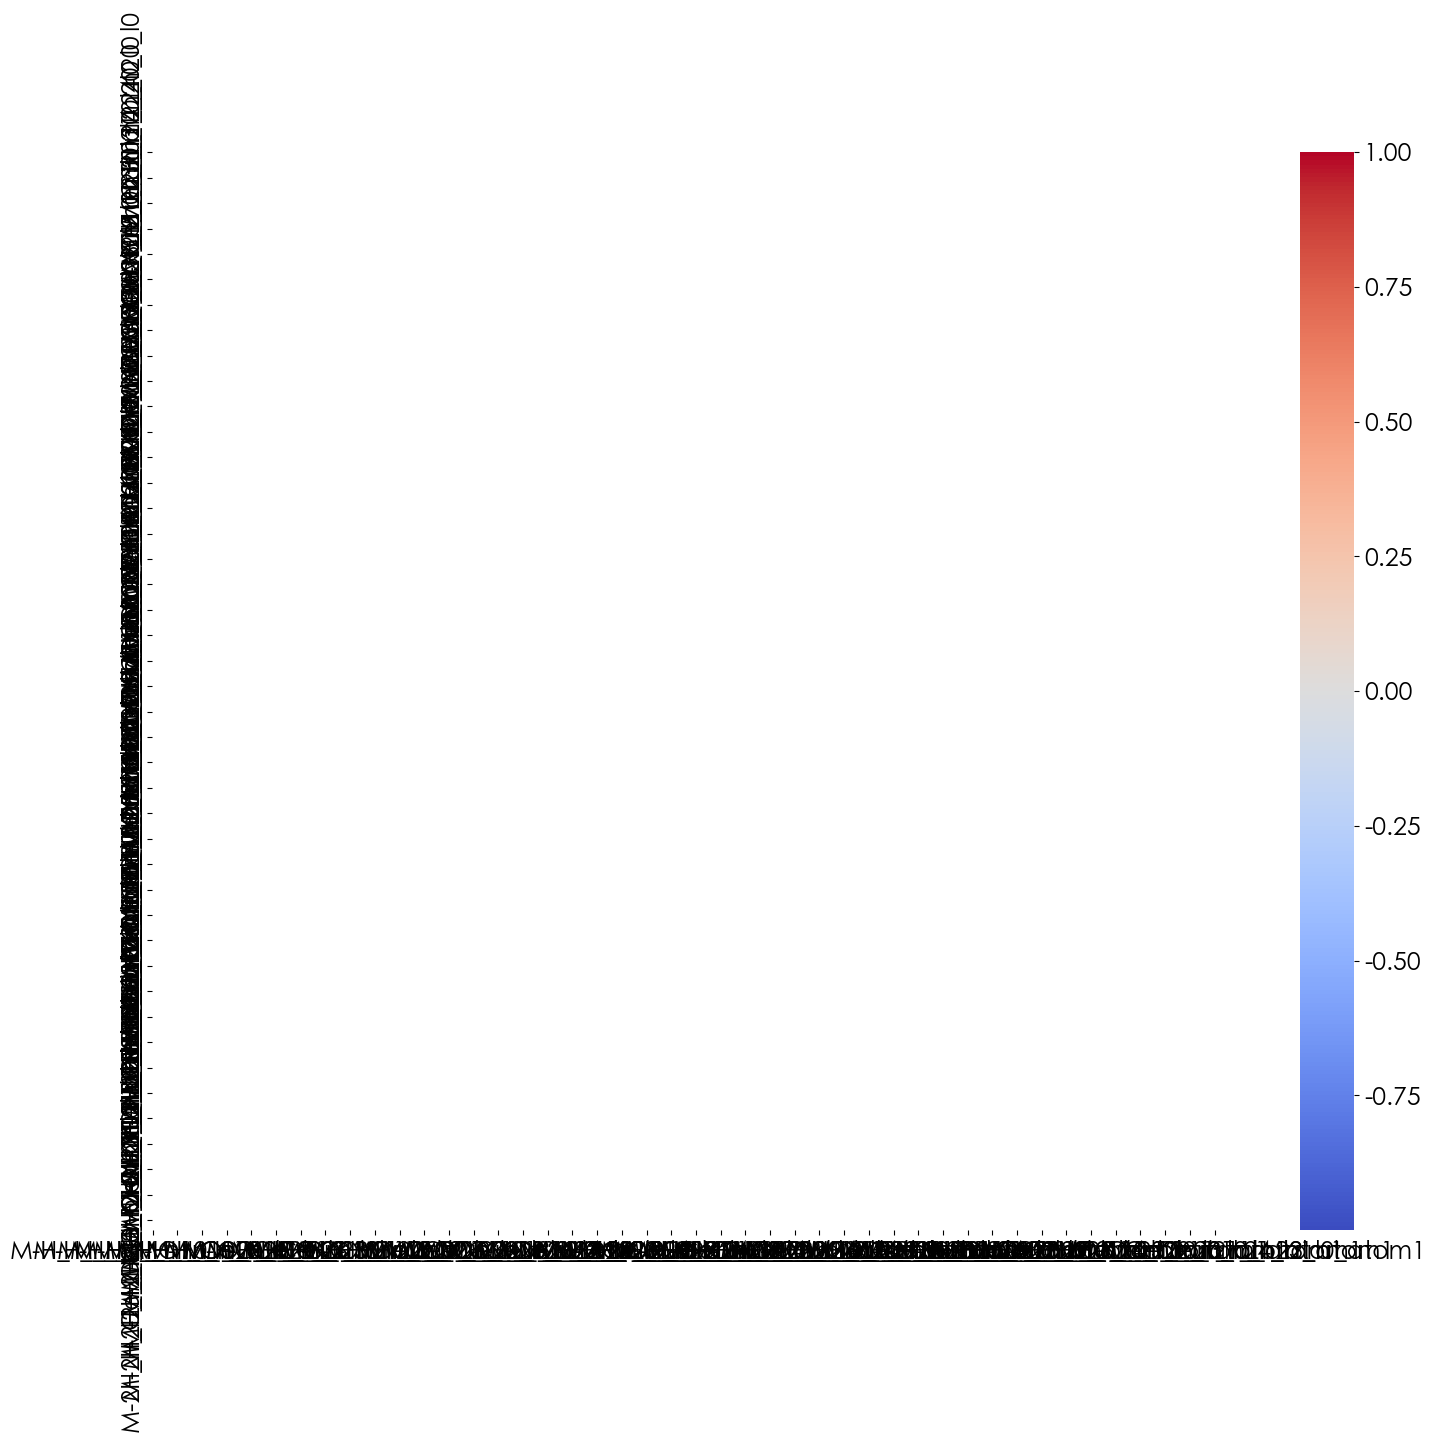

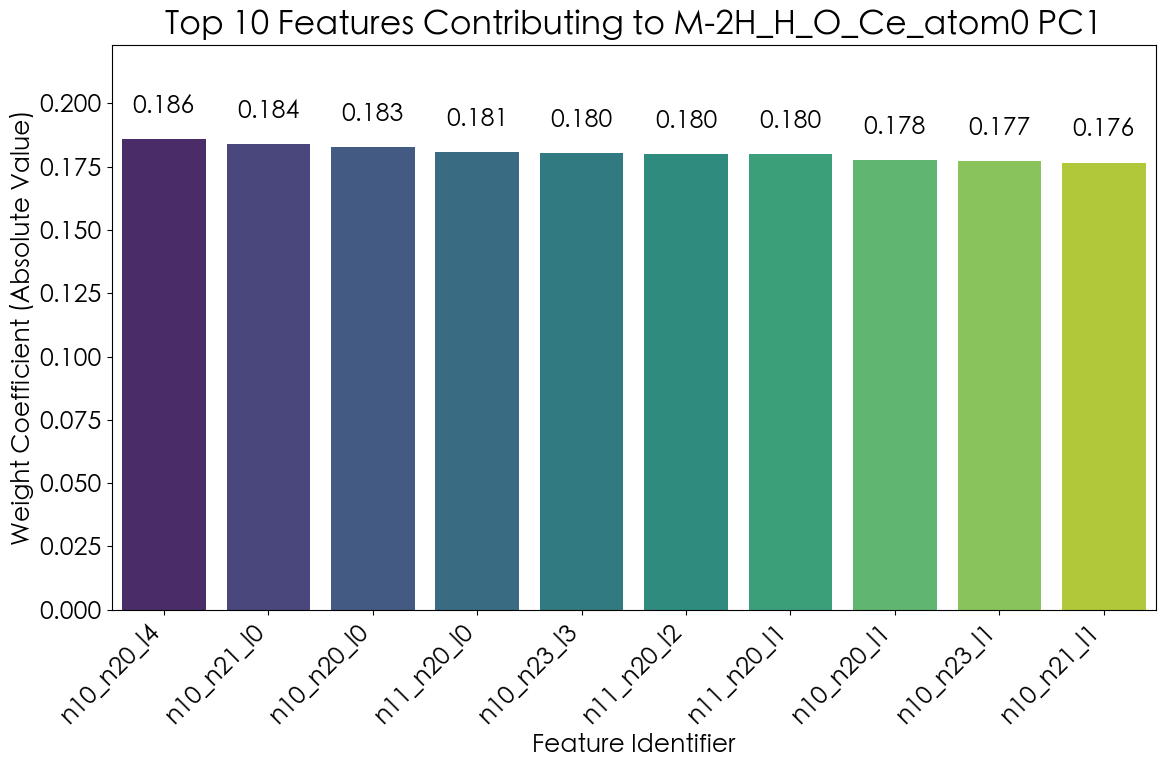

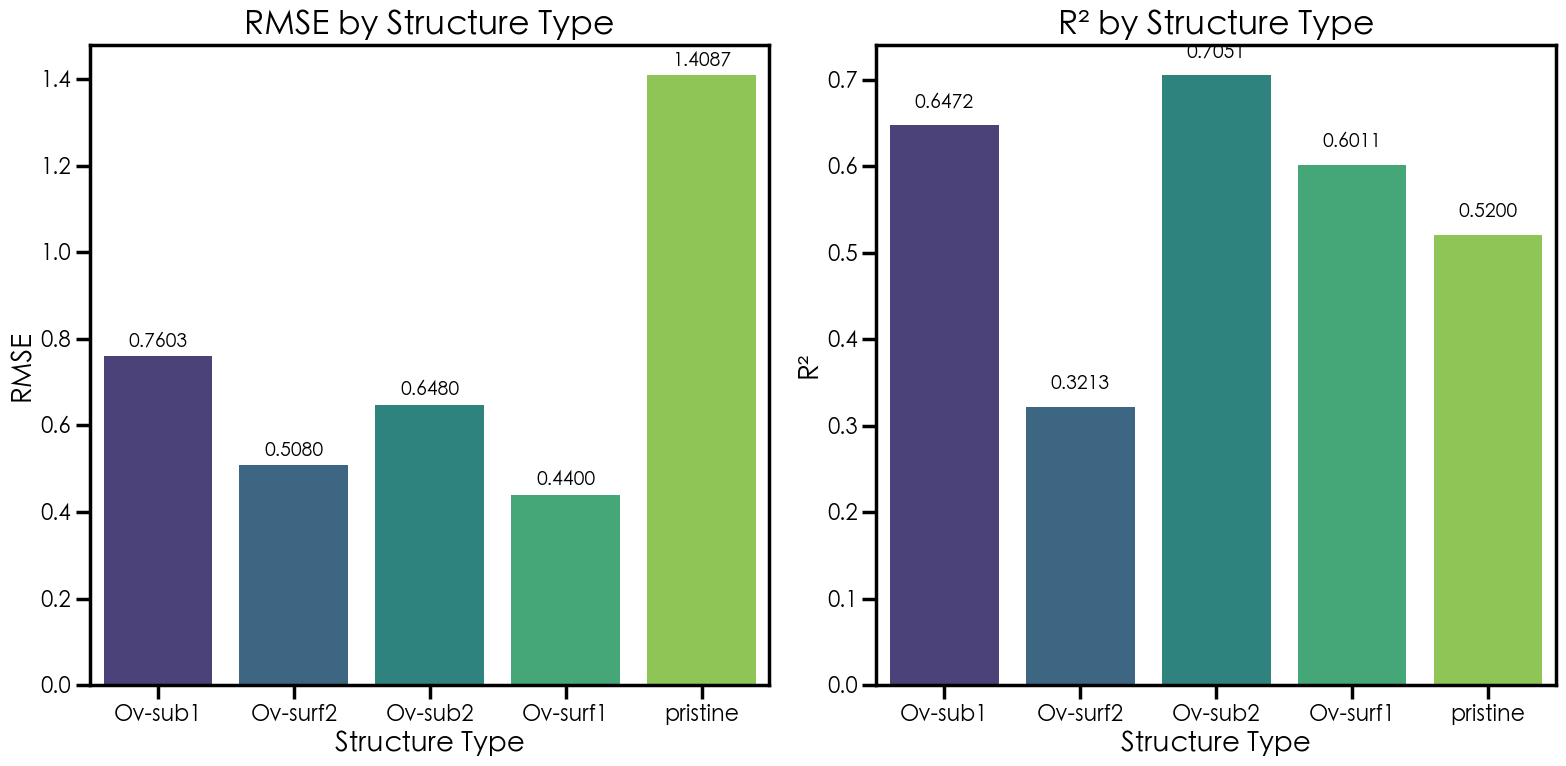

/opt/anaconda3/envs/M-CeO2/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) STHeiti.
  fig.canvas.print_figure(bytes_io, **kw)


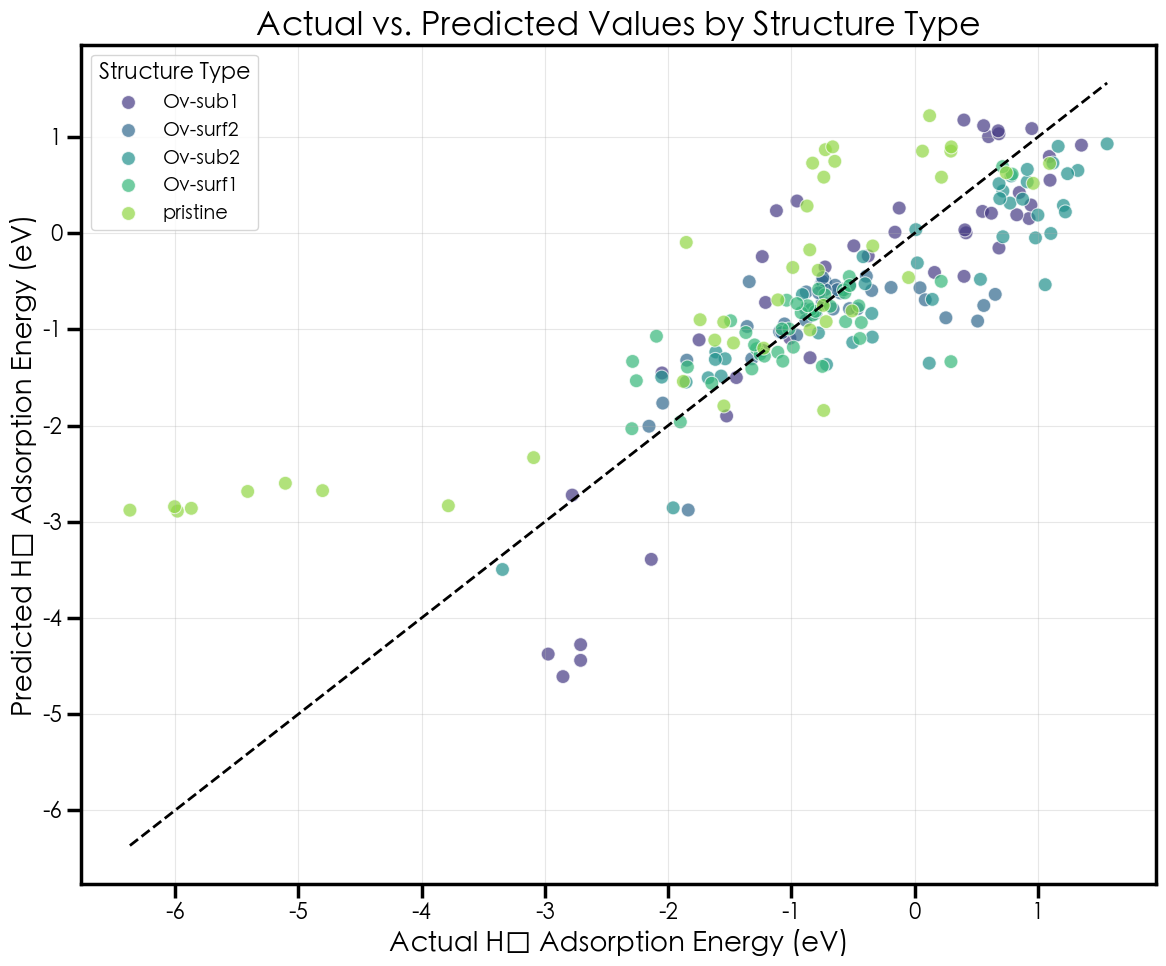

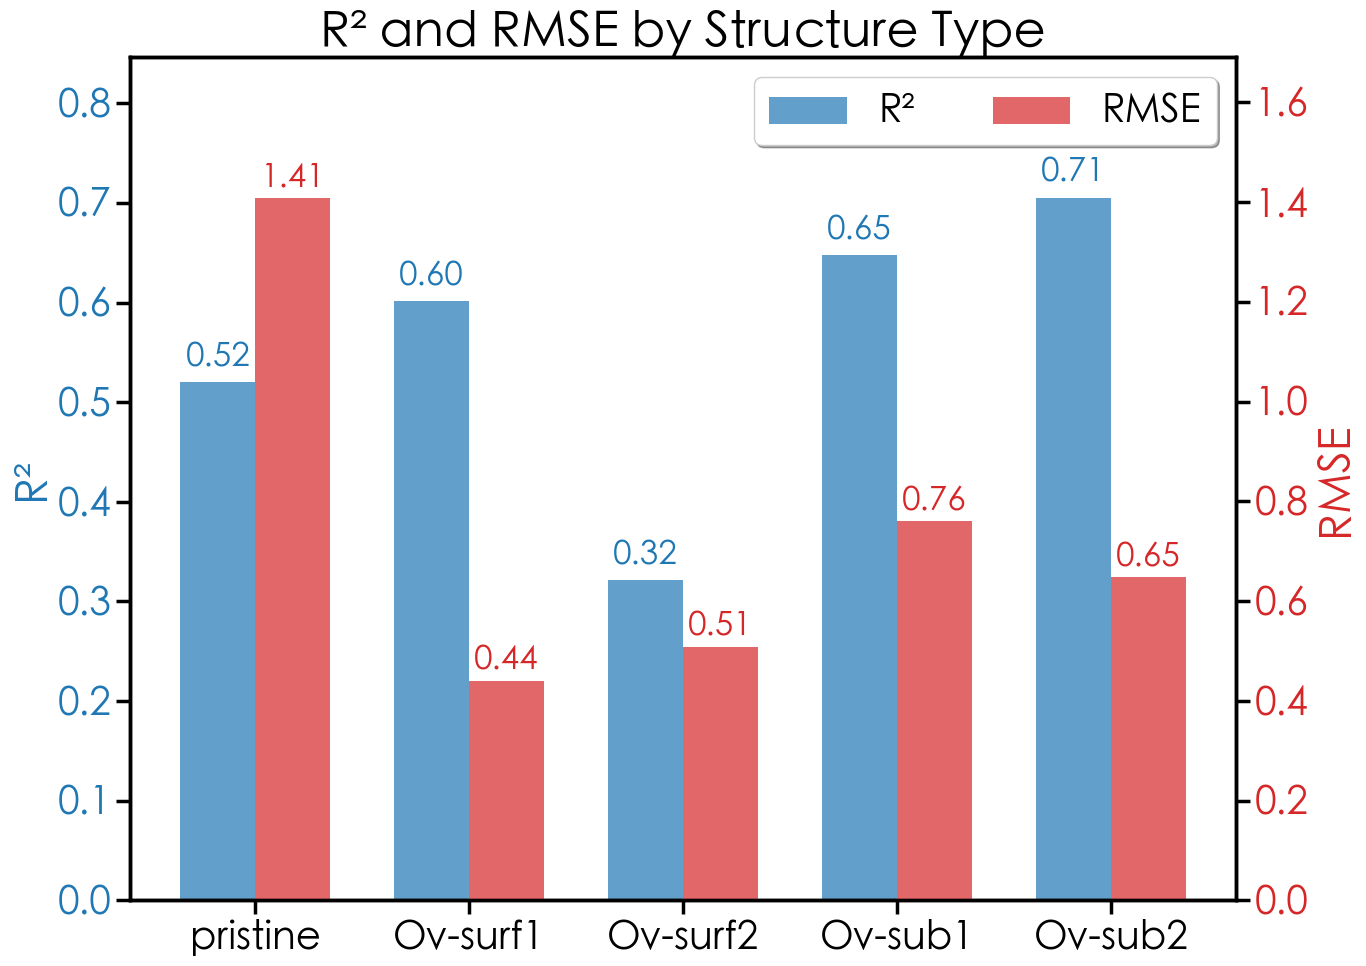

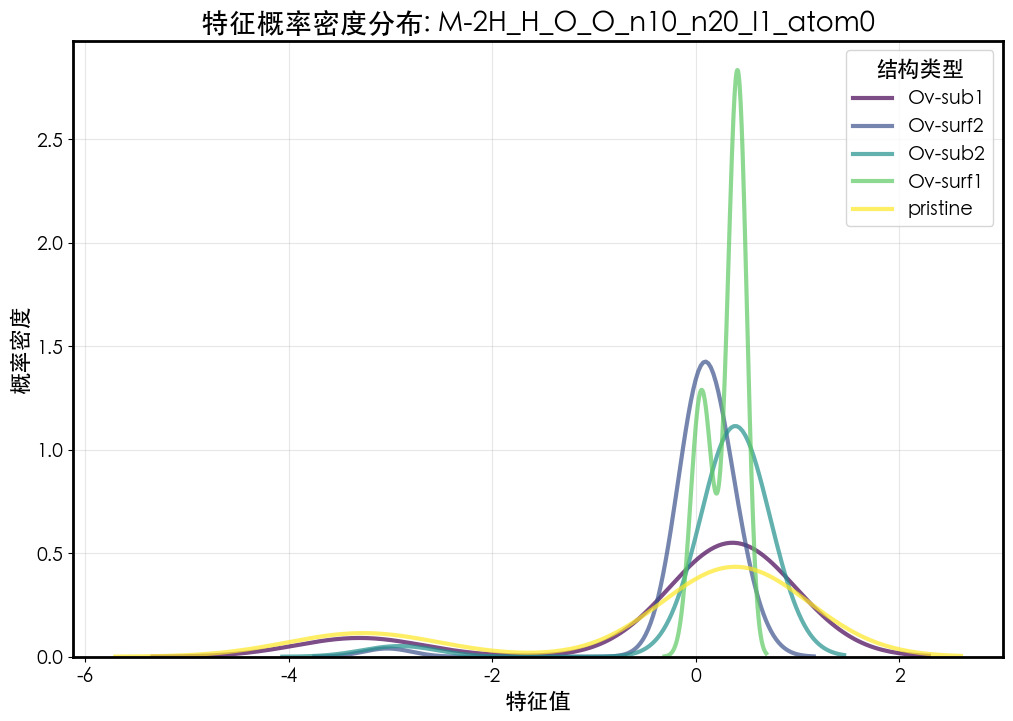

已保存特征 M-2H_H_H_O_n10_n20_l0_atom0 的密度分布图


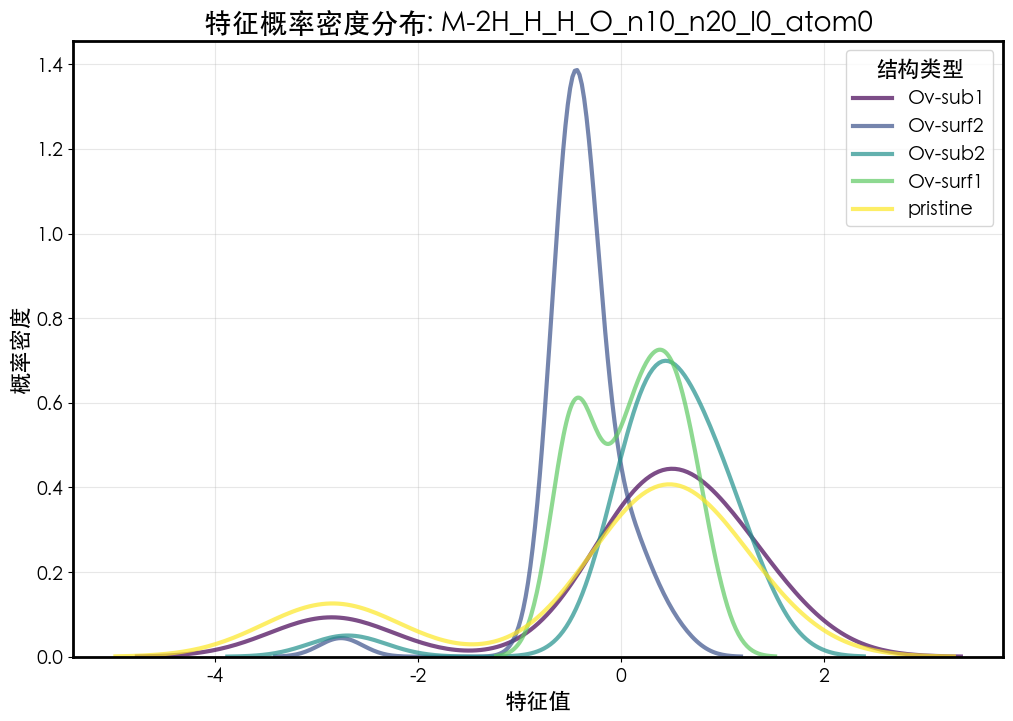

已保存前两个特征的联合分布图


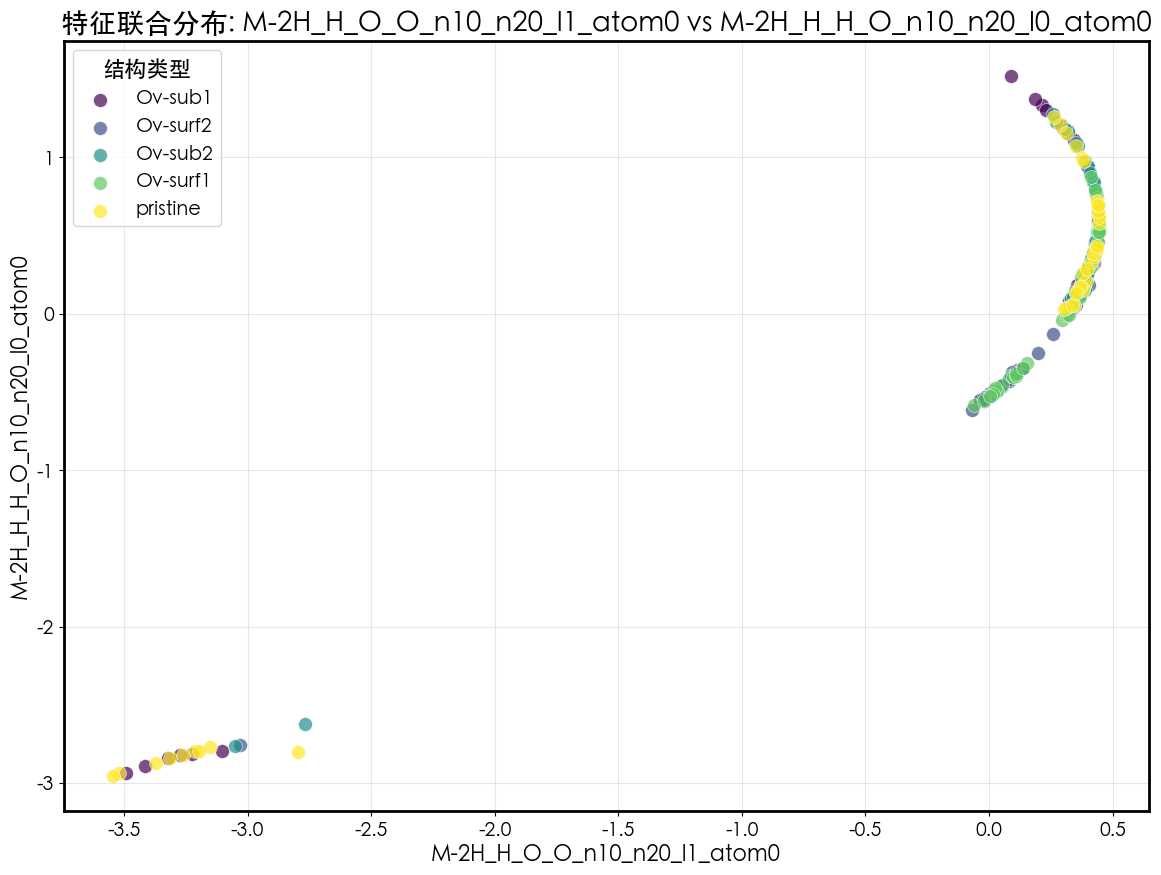

In [ ]:
def plot_top_features_density(data, top_n_features=2, structure_col='structure_type', target_col='H2_adsorption_energy', output_dir=None):
    """
    为各结构绘制前N个最重要特征的概率密度分布图
    
    参数:
    data: 包含特征、目标变量和结构标识的DataFrame
    top_n_features: 要绘制的顶级特征数量
    structure_col: 结构类型列名
    target_col: 目标变量列名
    output_dir: 输出目录
    """
    # 排除非特征列
    non_feature_cols = [structure_col, target_col]
    non_feature_cols.extend([col for col in data.columns if col in [
        'element', 'Electronegativity', 'First_Ionization_Energy', 'Second_Ionization_Energy',
        'Atomic_Radius', 'Covalent_Radius', 'Period', 'Group', 'Valence_Electrons', 'Electron_Shells',
        'M_energy', 'M2H_energy'
    ]])
    
    feature_cols = [col for col in data.columns if col not in non_feature_cols]
    
    # 获取特征重要性
    X = data[feature_cols]
    y = data[target_col]
    
    model = ExtraTreesRegressor(n_estimators=100, random_state=42)
    model.fit(X, y)
    
    # 获取最重要的特征
    importances = model.feature_importances_
    indices = np.argsort(importances)[::-1]
    top_features = [feature_cols[i] for i in indices[:top_n_features]]
    
    print(f"最重要的{top_n_features}个特征:")
    for i, feature in enumerate(top_features):
        print(f"{i+1}. {feature}: {importances[indices[i]]:.4f}")
    
    # 获取所有结构类型
    structures = data[structure_col].unique()
    
    # 设置颜色映射
    colors = plt.cm.viridis(np.linspace(0, 1, len(structures)))
    
    # 为每个顶级特征绘制分布图
    for feature in top_features:
        plt.figure(figsize=(12, 8))
        
        for i, structure in enumerate(structures):
            # 获取该结构的数据
            structure_data = data[data[structure_col] == structure][feature]
            
            # 使用KDE绘制概率密度分布
            sns.kdeplot(
                structure_data, 
                label=structure, 
                color=colors[i], 
                linewidth=3,
                alpha=0.7,
                common_norm=False  # 各分布独立归一化
            )
        
        plt.title(f'特征概率密度分布: {feature}', fontsize=20, fontweight='bold')
        plt.xlabel('特征值', fontsize=16, fontweight='bold')
        plt.ylabel('概率密度', fontsize=16, fontweight='bold')
        plt.legend(title='结构类型', fontsize=14, title_fontsize=16)
        plt.grid(alpha=0.3)
        
        # 美化图表
        ax = plt.gca()
        for spine in ax.spines.values():
            spine.set_linewidth(2)
        plt.xticks(fontsize=14)
        plt.yticks(fontsize=14)
        
        # 保存或显示图表
        if output_dir:
            os.makedirs(output_dir, exist_ok=True)
            safe_feature_name = feature.replace('/', '_').replace('\\', '_')
            plt.savefig(f"{output_dir}/top_feature_density_{safe_feature_name}.png", dpi=300, bbox_inches='tight')
            print(f"已保存特征 {feature} 的密度分布图")
        
        plt.show()
    
    # 绘制前两个特征的联合分布散点图
    if len(top_features) >= 2:
        plt.figure(figsize=(14, 10))
        
        # 为每个结构绘制散点
        for i, structure in enumerate(structures):
            structure_data = data[data[structure_col] == structure]
            plt.scatter(
                structure_data[top_features[0]],
                structure_data[top_features[1]],
                label=structure,
                color=colors[i],
                s=100,
                alpha=0.7,
                edgecolors='white',
                linewidth=0.5
            )
        
        plt.title(f'特征联合分布: {top_features[0]} vs {top_features[1]}', fontsize=20, fontweight='bold')
        plt.xlabel(top_features[0], fontsize=16, fontweight='bold')
        plt.ylabel(top_features[1], fontsize=16, fontweight='bold')
        plt.legend(title='结构类型', fontsize=14, title_fontsize=16)
        plt.grid(alpha=0.3)
        
        # 美化图表
        ax = plt.gca()
        for spine in ax.spines.values():
            spine.set_linewidth(2)
        plt.xticks(fontsize=14)
        plt.yticks(fontsize=14)
        
        # 保存或显示图表
        if output_dir:
            os.makedirs(output_dir, exist_ok=True)
            plt.savefig(f"{output_dir}/top_features_joint_distribution.png", dpi=300, bbox_inches='tight')
            print(f"已保存前两个特征的联合分布图")
        
        plt.show()

# 执行函数
output_dir = '/Users/wukai/Desktop/project/wjob/reports/figures/feature_distributions'
plot_top_features_density(data, top_n_features=2, output_dir=output_dir)

In [ ]:
def plot_structure_performance_combined(structure_performance, output_dir=None):
    """在同一图表上使用双Y轴绘制每个结构的R²（主轴，蓝色）和RMSE（副轴，红色）性能图"""
    from wjob.config import DEFAULT_STRUCTURE_NAME

    # 定义结构的显示顺序
    structure_order = ["pristine", "Ov-surf1", "Ov-surf2", "Ov-sub1", "Ov-sub2"]

    # 按照定义的顺序排列结构
    structures = [s for s in structure_order if s in structure_performance.keys()]

    # 确保所有在structure_performance中的结构都被包含
    missing_structures = [s for s in structure_performance.keys() if s not in structures]
    structures.extend(missing_structures)  # 添加任何可能不在预定义顺序中但存在于结果中的结构

    # 按照排序后的结构获取RMSE和R²值
    rmse_values = [structure_performance[s]['RMSE'] for s in structures]
    r2_values = [structure_performance[s]['R2'] for s in structures]
    
    # 设置中文字体并调整图像风格
    plt.rcParams['font.sans-serif'] = ['SimHei', 'STHeiti', 'Arial Unicode MS']
    plt.rcParams['axes.unicode_minus'] = False
    
    # 创建图形和主轴
    fig, ax1 = plt.subplots(figsize=(14, 10))
    
    # 绘制R²条形图（主轴，蓝色）
    x = np.arange(len(structures))
    width = 0.35
    bars1 = ax1.bar(x - width/2, r2_values, width, label='R²', color='tab:blue', alpha=0.7)
    
    # 设置主轴标签
    # ax1.set_xlabel('Structure Type', fontsize=28, fontweight='bold')
    ax1.set_ylabel('R²', fontsize=32, fontweight='bold', color='tab:blue')
    ax1.tick_params(axis='y', labelcolor='tab:blue', labelsize=28, width=2.5, length=10)
    ax1.tick_params(axis='x', labelsize=28, width=2.5, length=10, rotation=0)
    
    # 添加R²数值标签
    for i, bar in enumerate(bars1):
        height = bar.get_height()
        ax1.text(bar.get_x() + bar.get_width()/2, height + 0.01,
                f'{r2_values[i]:.2f}', ha='center', va='bottom', fontsize=24, color='tab:blue', fontweight='bold')
    
    # 创建第二个Y轴
    ax2 = ax1.twinx()
    
    # 绘制RMSE条形图（副轴，红色）
    bars2 = ax2.bar(x + width/2, rmse_values, width, label='RMSE', color='tab:red', alpha=0.7)
    
    # 设置第二个轴的标签
    ax2.set_ylabel('RMSE', fontsize=32, fontweight='bold', color='tab:red')
    ax2.tick_params(axis='y', labelcolor='tab:red', labelsize=28, width=2.5, length=10)
    
    # 添加RMSE数值标签
    for i, bar in enumerate(bars2):
        height = bar.get_height()
        ax2.text(bar.get_x() + bar.get_width()/2, height + 0.01,
                f'{rmse_values[i]:.2f}', ha='center', va='bottom', fontsize=24, color='tab:red', fontweight='bold')
    
    # 设置X轴刻度和标签
    ax1.set_xticks(x)
    ax1.set_xticklabels(structures)
    
    # 添加图表标题
    plt.title('R² and RMSE by Structure Type', fontsize=36, fontweight='bold')
    
    # 加粗坐标轴
    for spine in ax1.spines.values():
        spine.set_linewidth(2.5)
    for spine in ax2.spines.values():
        spine.set_linewidth(2.5)
    
    # 合并图例
    lines1, labels1 = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper right', fontsize=28, frameon=True, 
              fancybox=True, shadow=True, ncol=2)
    
    # 设置Y轴范围，防止图例遮挡
    ymax_r2 = max(r2_values) * 1.2  # 将y轴上限提高20%
    ax1.set_ylim(0, ymax_r2)
    
    ymax_rmse = max(rmse_values) * 1.2  # 将y轴上限提高20%
    ax2.set_ylim(0, ymax_rmse)
    
    # 调整布局
    fig.tight_layout()
    
    # 保存或显示图表
    if output_dir:
        os.makedirs(output_dir, exist_ok=True)
        plt.savefig(f"{output_dir}/structure_performance_combined.png", dpi=300, bbox_inches='tight')
        print(f"已保存性能图表到: {output_dir}/structure_performance_combined.png")
    else:
        plt.show()
        
    return fig, ax1, ax2

# 绘制性能图表
plot_structure_performance_combined(structure_performance, output_dir)

已保存性能图表到: /Users/wukai/Desktop/project/wjob/reports/figures/loso_cv/structure_performance_combined.png


(<Figure size 1400x1000 with 2 Axes>,
 <Axes: ylabel='R²'>,
 <Axes: title={'center': 'R² and RMSE by Structure Type'}, ylabel='RMSE'>)

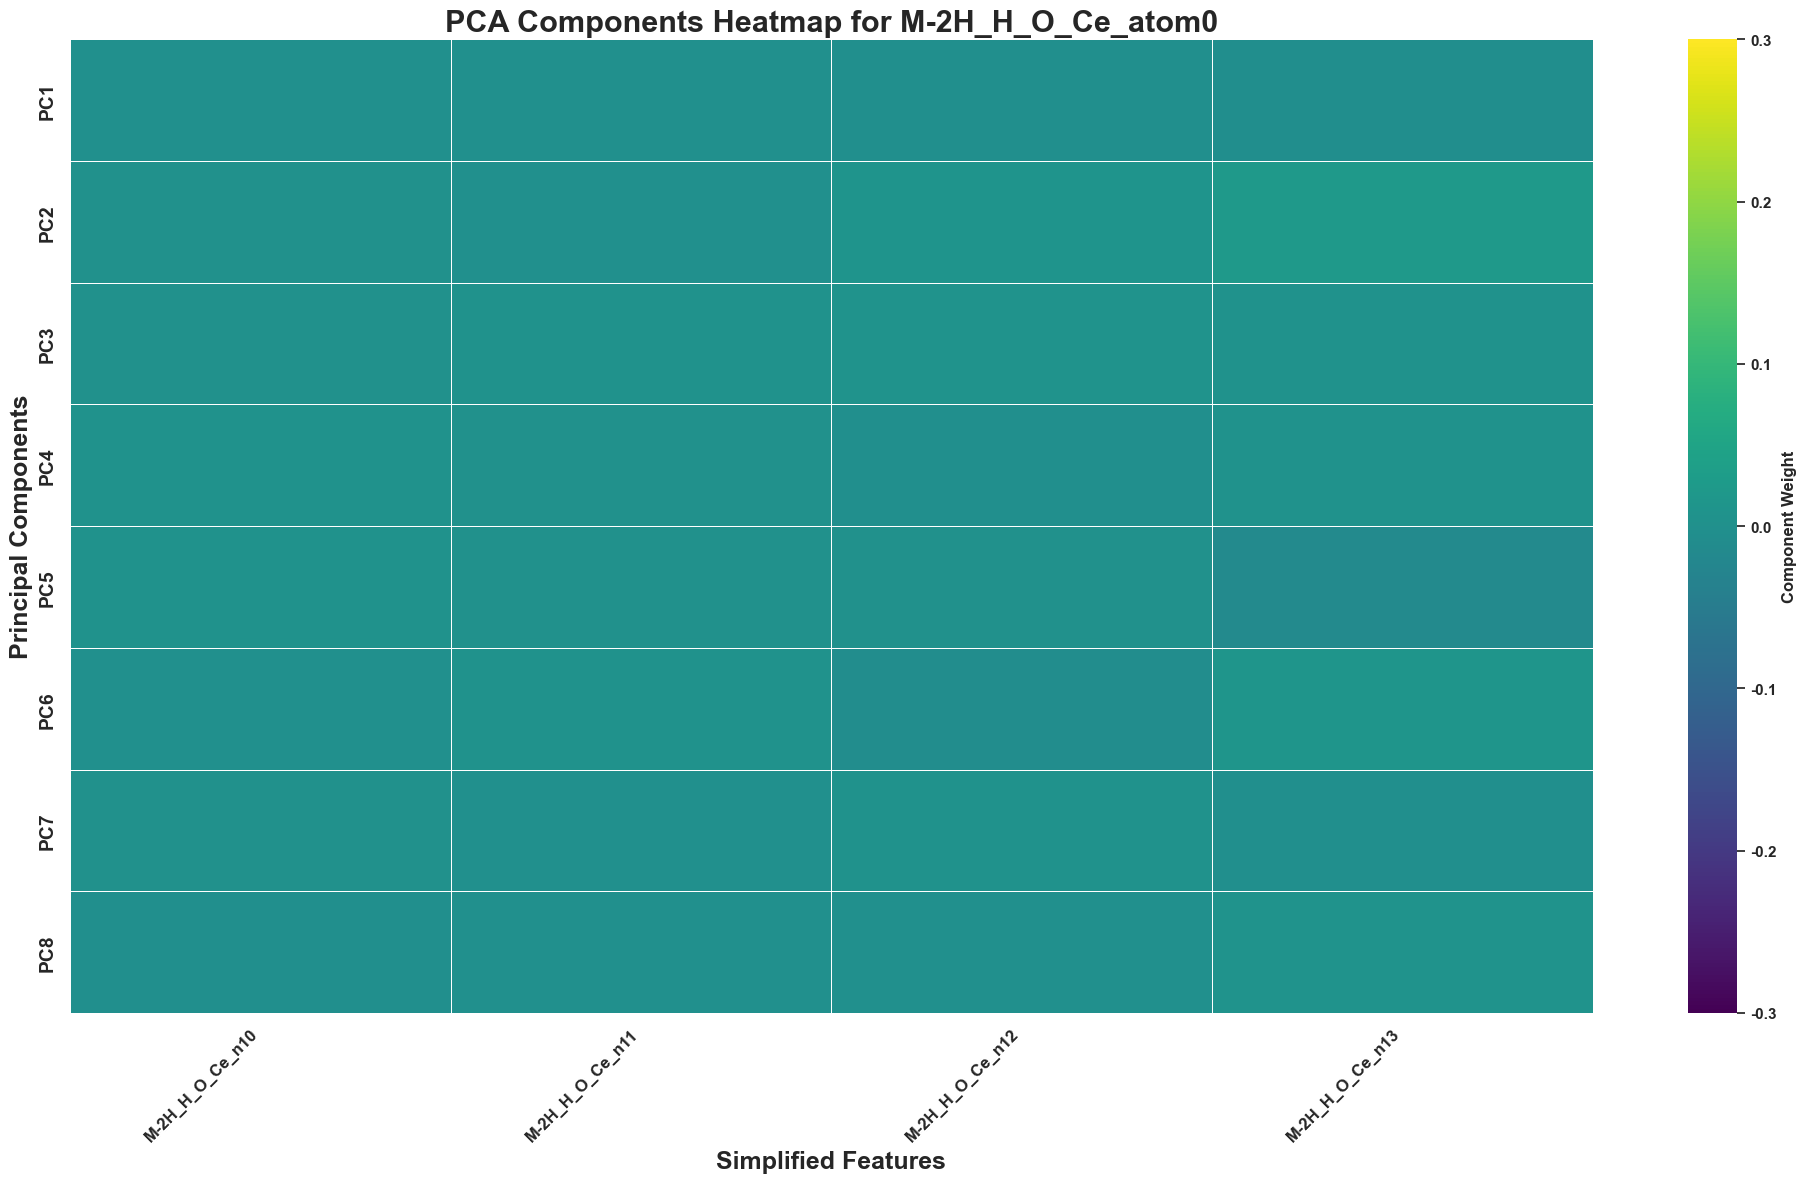

热图已保存至: /Users/wukai/Desktop/project/wjob/reports/figures/pca_analysis/M-2H_H_O_Ce_atom0_pca_heatmap.png


/var/folders/hb/v50y6l7d0hs_8jzrnqt60ndw0000gn/T/ipykernel_33710/3423259681.py:95: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_contributors.index, y=original_values, palette=colors)


已保存 PC1 的贡献图到: /Users/wukai/Desktop/project/wjob/reports/figures/pca_analysis/PC1_top_contributors.png


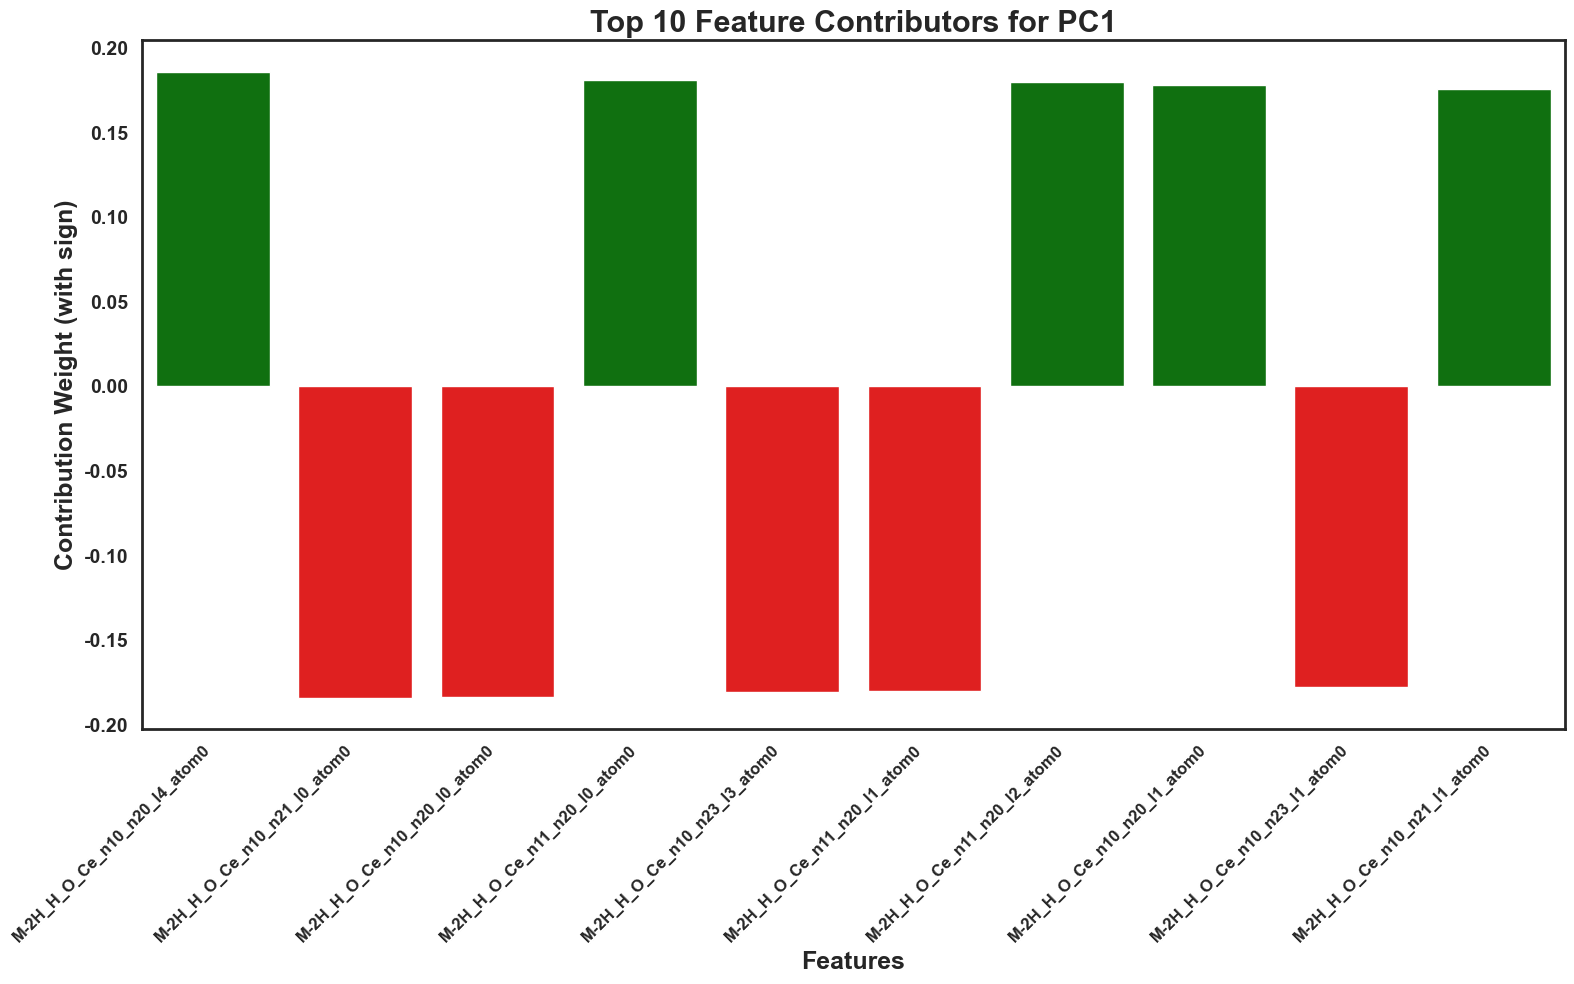

/var/folders/hb/v50y6l7d0hs_8jzrnqt60ndw0000gn/T/ipykernel_33710/3423259681.py:95: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_contributors.index, y=original_values, palette=colors)


已保存 PC2 的贡献图到: /Users/wukai/Desktop/project/wjob/reports/figures/pca_analysis/PC2_top_contributors.png


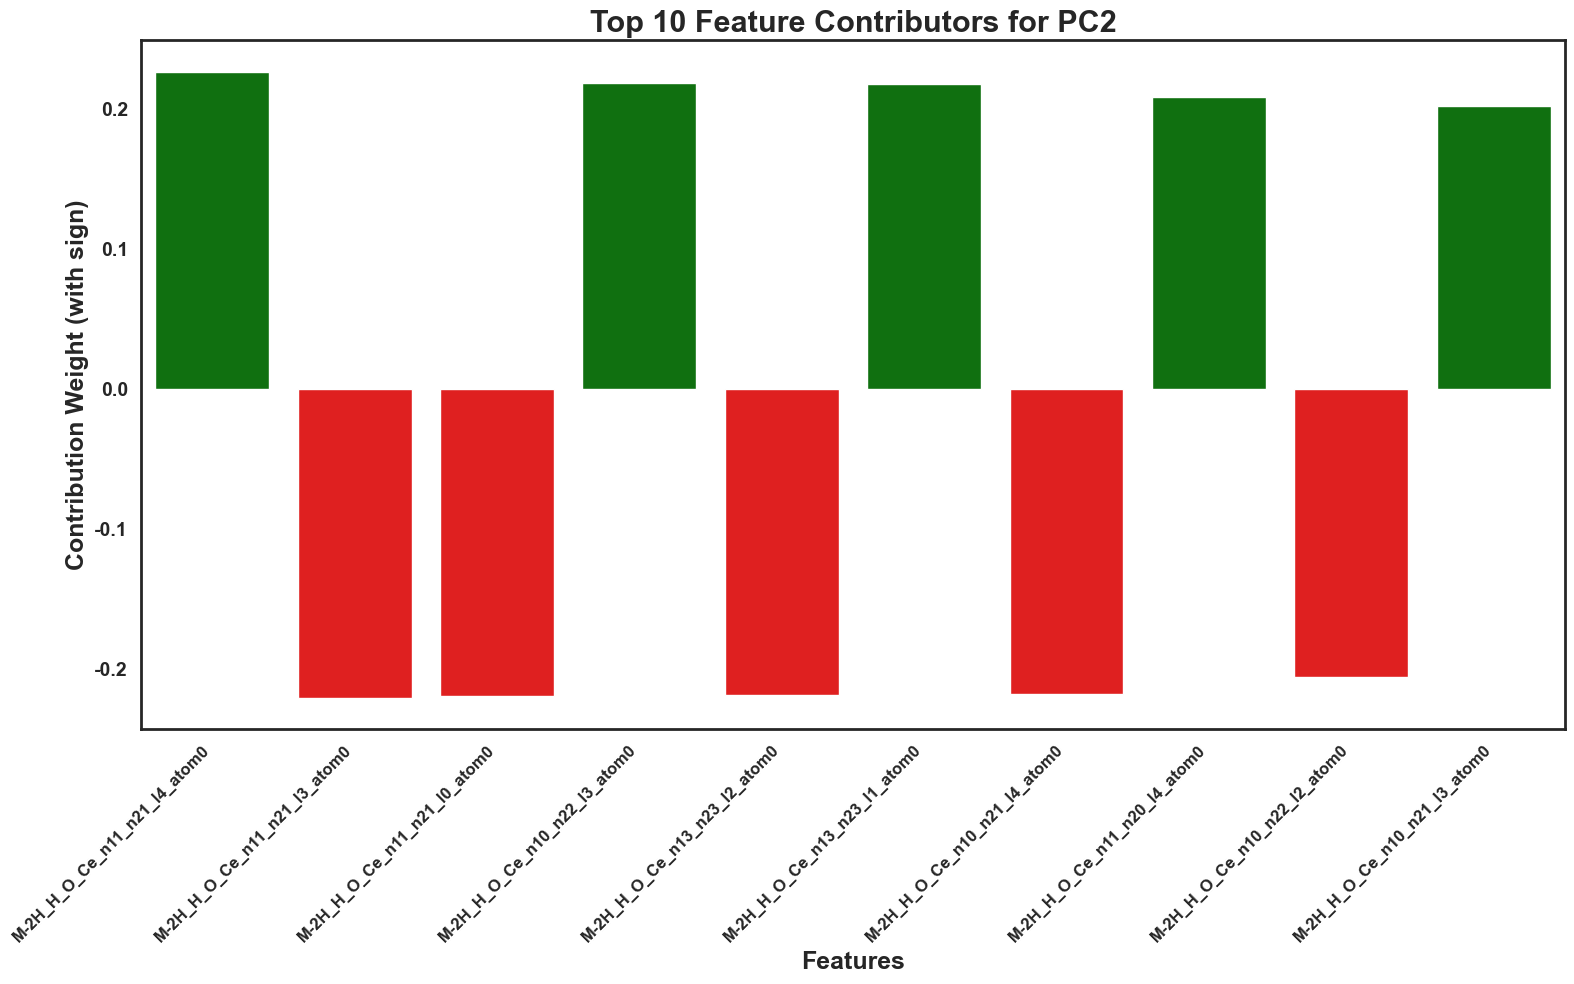

/var/folders/hb/v50y6l7d0hs_8jzrnqt60ndw0000gn/T/ipykernel_33710/3423259681.py:95: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_contributors.index, y=original_values, palette=colors)


已保存 PC3 的贡献图到: /Users/wukai/Desktop/project/wjob/reports/figures/pca_analysis/PC3_top_contributors.png


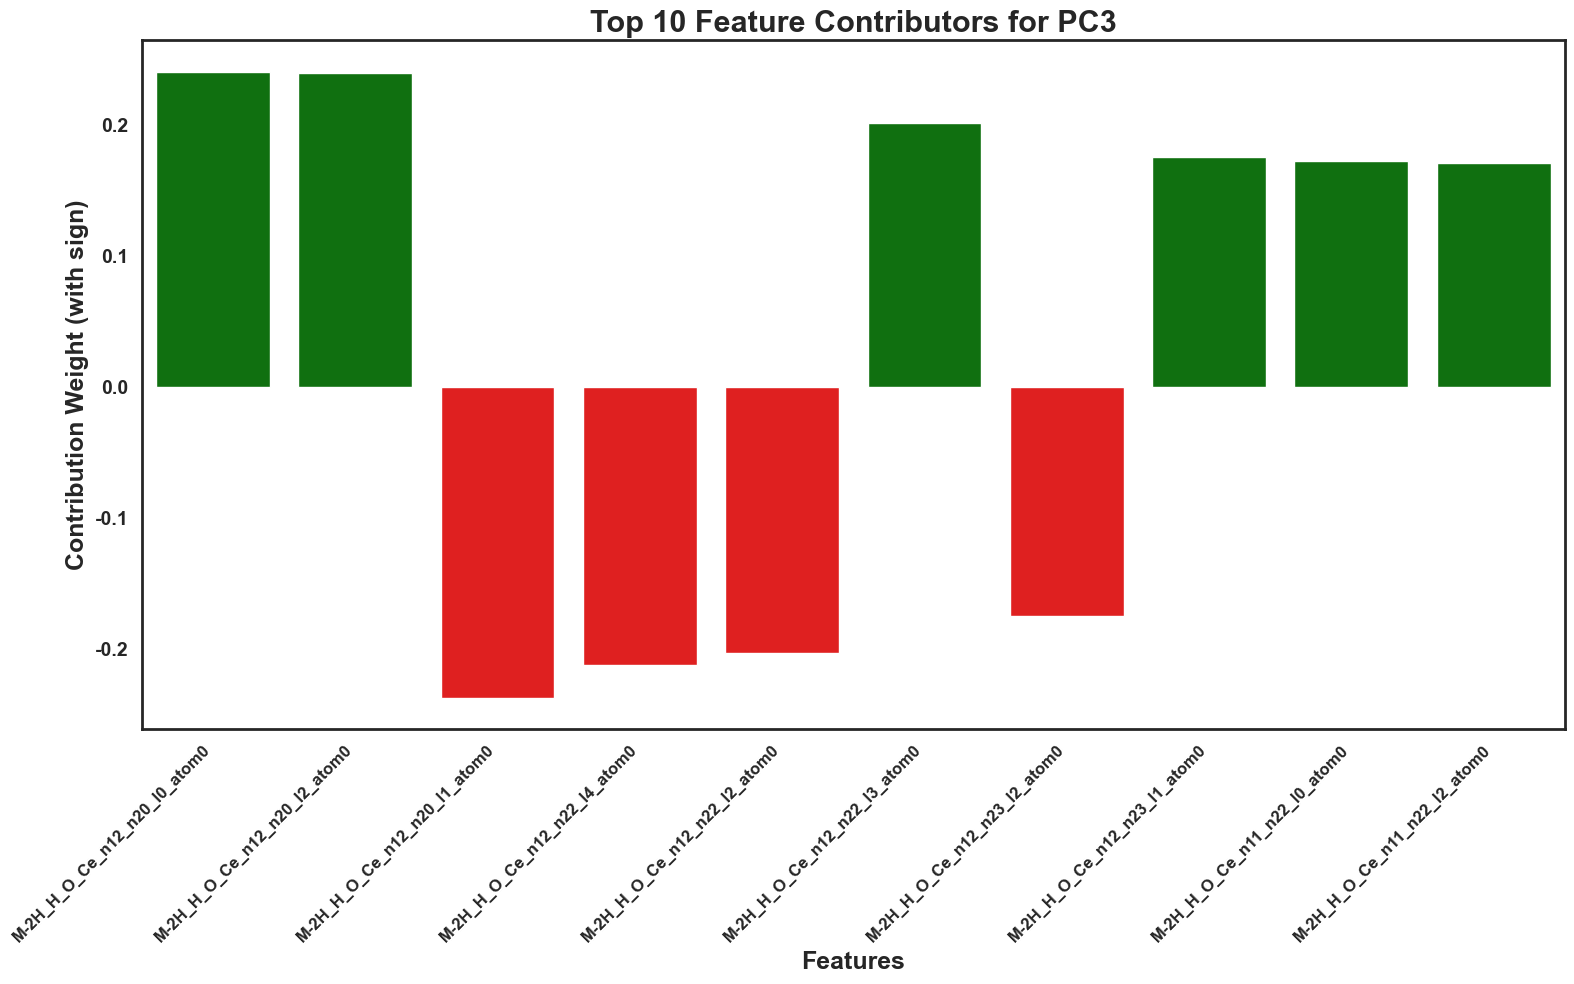

In [ ]:
# 导入必要的库
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# 设置中文字体与图表样式
plt.rcParams['font.sans-serif'] = ['SimHei', 'STHeiti', 'Arial Unicode MS']
plt.rcParams['axes.unicode_minus'] = False
sns.set(style="white")

# 读取PCA成分数据
file_path = '/Users/wukai/Desktop/project/wjob/data/fea/final/pca_plots_90pct/components/pca_components_M-2H_H_O_Ce_atom0.csv'
pca_data = pd.read_csv(file_path)

# 将第一列设为索引
pca_data = pca_data.set_index('principal_component')

# 转置数据以使得特征名称作为列，主成分作为行
pca_data_transposed = pca_data.T

# 选择前N个主成分进行可视化(例如前8个)
n_components = 8
pca_data_subset = pca_data.iloc[:n_components]

# 为了更好的可视化，简化特征名称
def simplify_feature_name(name):
    # 提取特征名称中的关键部分
    parts = name.split('_')
    if len(parts) > 5:
        # 保留主要信息: 元素组合和量子数信息
        return f"{parts[0]}_{parts[1]}_{parts[2]}_{parts[3]}_{parts[4]}"
    return name

# 创建一个新的DataFrame，包含简化的特征名
simplified_columns = [simplify_feature_name(col) for col in pca_data.columns]
unique_simplified = []
for name in simplified_columns:
    if name not in unique_simplified:
        unique_simplified.append(name)

# 为了使热图更易读，计算每个简化特征名的平均贡献
aggregated_data = pd.DataFrame(index=pca_data_subset.index, columns=unique_simplified)
for i, simple_name in enumerate(unique_simplified):
    # 找到所有匹配此简化名称的原始列
    matching_cols = [col for j, col in enumerate(pca_data.columns) if simplify_feature_name(col) == simple_name]
    # 计算这些列的平均值
    aggregated_data[simple_name] = pca_data_subset[matching_cols].mean(axis=1)

# 绘制热图
plt.figure(figsize=(20, 12))
sns.heatmap(aggregated_data, cmap="viridis", linewidths=0.5, linecolor='white', 
            cbar_kws={'label': 'Component Weight'}, vmin=-0.3, vmax=0.3)

# 添加标题和标签
plt.title('PCA Components Heatmap for M-2H_H_O_Ce_atom0', fontsize=22, fontweight='bold')
plt.xlabel('Simplified Features', fontsize=18, fontweight='bold')
plt.ylabel('Principal Components', fontsize=18, fontweight='bold')

# 调整标签大小和方向
plt.xticks(fontsize=12, rotation=45, ha='right', fontweight='bold')
plt.yticks(fontsize=14, fontweight='bold')

# 加强坐标轴线条
ax = plt.gca()
for spine in ax.spines.values():
    spine.set_linewidth(2)

# 保存图表
output_dir = '/Users/wukai/Desktop/project/wjob/reports/figures/pca_analysis'
os.makedirs(output_dir, exist_ok=True)
plt.tight_layout()
plt.savefig(f"{output_dir}/M-2H_H_O_Ce_atom0_pca_heatmap.png", dpi=300, bbox_inches='tight')
plt.show()

print(f"热图已保存至: {output_dir}/M-2H_H_O_Ce_atom0_pca_heatmap.png")

# 为了更详细的分析，还可以绘制每个主成分的Top贡献特征
def plot_top_contributors(pca_data, n_components=3, top_n=10, output_dir=None):
    """绘制每个主成分的前N个贡献最大的特征"""
    for i in range(n_components):
        pc_name = pca_data.index[i]
        # 获取此主成分的所有特征贡献并排序
        contributions = pca_data.loc[pc_name].abs()
        top_contributors = contributions.sort_values(ascending=False).head(top_n)
        
        plt.figure(figsize=(16, 10))
        
        # 使用贡献的原始值（带符号）
        original_values = pca_data.loc[pc_name, top_contributors.index]
        colors = ['red' if x < 0 else 'green' for x in original_values]
        
        # 绘制柱状图
        sns.barplot(x=top_contributors.index, y=original_values, palette=colors)
        
        plt.title(f'Top {top_n} Feature Contributors for {pc_name}', fontsize=22, fontweight='bold')
        plt.xlabel('Features', fontsize=18, fontweight='bold')
        plt.ylabel('Contribution Weight (with sign)', fontsize=18, fontweight='bold')
        plt.xticks(rotation=45, ha='right', fontsize=12, fontweight='bold')
        plt.yticks(fontsize=14, fontweight='bold')
        
        # 加强坐标轴
        ax = plt.gca()
        for spine in ax.spines.values():
            spine.set_linewidth(2)
        
        plt.tight_layout()
        
        if output_dir:
            os.makedirs(output_dir, exist_ok=True)
            plt.savefig(f"{output_dir}/{pc_name}_top_contributors.png", dpi=300, bbox_inches='tight')
            print(f"已保存 {pc_name} 的贡献图到: {output_dir}/{pc_name}_top_contributors.png")
        
        plt.show()

# 绘制前3个主成分的Top-10贡献特征图
plot_top_contributors(pca_data, n_components=3, top_n=10, output_dir=output_dir)

In [ ]:
# # 在循环外初始化字典来跟踪每个数据点在测试集中出现的次数和累计误差
# import numpy as np
# import pandas as pd
# from collections import defaultdict

# # 用于存储每个数据点的信息
# point_errors = defaultdict(lambda: {'count': 0, 'total_error': 0, 'errors': []})
# point_indices = {}  # 用于存储原始索引到数据点的映射

# # 修改你的循环，在每次迭代中记录每个测试点的误差
# for i in range(1, 100):
#     X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, test_size=0.3, random_state=i)
    
#     model = RandomForestRegressor(
#         max_depth=15,             
#         n_estimators=500,         
#         min_samples_split=2,      
#         min_samples_leaf=1,
#         warm_start=True,          
#     )
#     model.fit(X_train, y_train)
#     y_pred = model.predict(X_test)
#     y_pred1 = model.predict(X_train)
    
#     test_mse = mean_squared_error(y_test, y_pred)
#     r2 = r2_score(y_test, y_pred)
#     r1 = r2_score(y_train, y_pred1)
    
#     # 记录统计指标
#     R2_tests.append(r2)
#     R2_trains.append(r1)
#     RMSE_trains.append(np.sqrt(mean_squared_error(y_train, y_pred1)))
#     RMSE_tests.append(np.sqrt(test_mse))
    
#     # 记录每个测试点的误差
#     test_indices = X_test.index if isinstance(X_test, pd.DataFrame) else np.arange(len(X_all))[np.isin(np.arange(len(X_all)), X_test)]
    
#     for idx, true_val, pred_val in zip(test_indices, y_test, y_pred):
#         # 使用绝对误差或平方误差
#         error = abs(true_val - pred_val)  # 或 (true_val - pred_val)**2
        
#         # 如果是DataFrame或Series，将索引转换为字符串以便作为字典键
#         key = str(idx)
        
#         # 存储原始索引到数据点的映射
#         if key not in point_indices:
#             point_indices[key] = idx
            
#         # 更新统计信息
#         point_errors[key]['count'] += 1
#         point_errors[key]['total_error'] += error
#         point_errors[key]['errors'].append(error)
        
#         # 可以选择存储真实值和预测值
#         if 'true_val' not in point_errors[key]:
#             point_errors[key]['true_val'] = true_val

# # 计算每个点的平均误差
# for key in point_errors:
#     point_errors[key]['mean_error'] = point_errors[key]['total_error'] / point_errors[key]['count']
#     # 计算标准差
#     if len(point_errors[key]['errors']) > 1:
#         point_errors[key]['std_error'] = np.std(point_errors[key]['errors'])
#     else:
#         point_errors[key]['std_error'] = 0

# # 找出平均误差最大的点（出现次数至少为30次）
# min_appearances = 30  # 至少在30%的测试集中出现
# worst_points = {k: v for k, v in point_errors.items() if v['count'] >= min_appearances}
# worst_points_sorted = sorted(worst_points.items(), key=lambda x: x[1]['mean_error'], reverse=True)

# # 输出结果
# print(f"\n在至少{min_appearances}次测试中出现的预测最差的点:")
# for i, (key, stats) in enumerate(worst_points_sorted[:10]):  # 显示前10个最差的点
#     orig_idx = point_indices[key]
#     print(f"原始索引: {orig_idx}, 平均误差: {stats['mean_error']:.4f}, "
#           f"误差标准差: {stats['std_error']:.4f}, 出现次数: {stats['count']}")
    
#     # 如果有X_all，可以显示该点的特征
#     if isinstance(X_all, pd.DataFrame):
#         print(f"特征值:")
#         print(X_all.loc[orig_idx])
#     print("-" * 50)

# # 可视化最差的预测点
# if isinstance(X_all, pd.DataFrame) and isinstance(y_all, (pd.Series, np.ndarray)):
#     import matplotlib.pyplot as plt
    
#     # 获取前5个最差点的索引
#     worst_indices = [point_indices[key] for key, _ in worst_points_sorted[:5]]
    
#     plt.figure(figsize=(10, 6))
    
#     # 绘制所有点
#     if isinstance(y_all, pd.Series):
#         plt.scatter(range(len(y_all)), y_all, alpha=0.3, label='所有点')
#         # 标记最差的点
#         plt.scatter(worst_indices, y_all.loc[worst_indices], color='red', s=100, label='预测最差的点')
#     else:
#         plt.scatter(range(len(y_all)), y_all, alpha=0.3, label='所有点')
#         # 标记最差的点
#         plt.scatter(worst_indices, [y_all[i] for i in worst_indices], color='red', s=100, label='预测最差的点')
    
#     plt.xlabel('数据点索引')
#     plt.ylabel('目标值')
#     plt.title('标记出预测最差的点')
#     plt.legend()
#     plt.show()
    
#     # 分析这些最差点的特征分布
#     print("\n预测最差点的特征统计与整体比较:")
#     worst_samples = X_all.loc[worst_indices]
    
#     for col in X_all.columns:
#         overall_mean = X_all[col].mean()
#         worst_mean = worst_samples[col].mean()
#         print(f"{col}: 整体平均值 = {overall_mean:.4f}, 最差点平均值 = {worst_mean:.4f}, "
#               f"差异率 = {(worst_mean-overall_mean)/overall_mean*100:.2f}%")

In [ ]:
import pandas as pd
import numpy as np

# 针对某个重要的PCA特征，例如M-2H_H_O_Ce_atom0_PC1
feature_group = "M-2H_H_O_Ce_atom0"
pc_num = 1  # PC1

# 读取对应的PCA成分文件
components_file = f"/Users/wukai/Desktop/project/wjob/data/fea/final/pca_plots_90pct/components/pca_components_{feature_group}.csv"
components_df = pd.read_csv(components_file)

# 获取PC1的权重
pc_row = components_df[components_df['principal_component'] == f'PC{pc_num}']

if not pc_row.empty:
    # 提取除了'principal_component'之外的所有列，这些是原始特征
    weights = pc_row.iloc[0, 1:].abs()  # 取绝对值，因为我们关心贡献大小而不是方向
    
    # 按权重排序找出贡献最大的原始特征
    top_original_features = weights.sort_values(ascending=False)
    
    print(f"对于{feature_group}_PC{pc_num}，贡献最大的原始特征及其权重为：")
    print(top_original_features.head(10))  # 显示前10个贡献最大的特征

# 为特定主成分的前10个重要特征绘制柱状图（简化特征名显示）
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import os
import re

def plot_top_features_barplot(components_df, feature_group, pc_num, output_dir=None, top_n=10):
    """
    为特定主成分的贡献最大特征绘制柱状图，x轴特征名仅显示关键标识符
    
    参数:
    components_df: 包含PCA成分的DataFrame
    feature_group: 特征组名称，如'M-2H_H_O_M_atom1'
    pc_num: 主成分编号 (例如 1代表PC1)
    output_dir: 输出目录，若为None则只显示不保存
    top_n: 要显示的顶部特征数量
    """
    # 获取PC的权重行
    pc_row = components_df[components_df['principal_component'] == f'PC{pc_num}']
    
    if pc_row.empty:
        print(f"未找到PC{pc_num}的数据")
        return
    
    # 提取权重并取绝对值
    weights = pc_row.iloc[0, 1:].abs()
    
    # 按权重排序找出贡献最大的特征
    top_features = weights.sort_values(ascending=False).head(top_n)
    
    # 提取特征名中的关键标识符部分 (n10_n20_l0等)
    simplified_names = []
    for feature_name in top_features.index:
        # 使用正则表达式提取n和l参数
        match = re.search(r'(n\d+_n\d+_l\d+)', feature_name)
        if match:
            simplified_names.append(match.group(1))
        else:
            # 如果无法匹配，使用原始名称的后10个字符
            simplified_names.append(feature_name[-10:] if len(feature_name) > 10 else feature_name)
    
    # 创建一个新的DataFrame用于绘图
    plot_df = pd.DataFrame({
        '特征标识': simplified_names,
        '特征完整名称': top_features.index,
        '权重系数(绝对值)': top_features.values
    })
    
    # 设置中文字体
    plt.rcParams['font.sans-serif'] = ['SimHei', 'STHeiti', 'Arial Unicode MS']
    plt.rcParams['axes.unicode_minus'] = False
    
    # 创建图形
    plt.figure(figsize=(12, 8))
    
    # 绘制柱状图
    ax = sns.barplot(x='特征标识', y='权重系数(绝对值)', data=plot_df, palette='viridis')
    
    # 设置标题和标签
    plt.title(f'Top {top_n} Features Contributing to {feature_group} PC{pc_num}', fontsize=24)
    plt.ylabel('Weight Coefficient (Absolute Value)', fontsize=18)
    plt.xlabel('Feature Identifier', fontsize=18)
    
    # 旋转x轴标签以确保可读性
    plt.xticks(rotation=45, ha='right')
    
    # 在每个柱子上添加数值标签
    for i, v in enumerate(top_features.values):
        ax.text(i, v + 0.01, f'{v:.3f}', ha='center', fontsize=18)
    max_value = top_features.max()
    plt.ylim(0, max_value * 1.2)  # 将y轴上限设为最大值的1.2倍，提供足够空间
    
    plt.tight_layout()
    
    # 保存或显示图表
    if output_dir:
        os.makedirs(output_dir, exist_ok=True)
        plt.savefig(f"{output_dir}/{feature_group}_PC{pc_num}_top_features.png", dpi=300, bbox_inches='tight')
        print(f"已保存图表到: {output_dir}/{feature_group}_PC{pc_num}_top_features.png")
    else:
        plt.show()
    
    # 打印特征标识与完整特征名对应关系，方便参考
    print("特征标识与完整名称对应关系:")
    for s, f in zip(simplified_names, top_features.index):
        print(f"{s}: {f}")
    
    return plot_df

# 在Jupyter中使用此函数的示例:
components_df = pd.read_csv('/Users/wukai/Desktop/project/wjob/data/fea/final/pca_plots_90pct/components/pca_components_M-2H_H_O_Ce_atom0.csv')
feature_group = 'M-2H_H_O_Ce_atom0'
plot_top_features_barplot(components_df, feature_group, 1, output_dir='/Users/wukai/Desktop/project/wjob/reports/figures/pca_analysis')

对于M-2H_H_O_Ce_atom0_PC1，贡献最大的原始特征及其权重为：
M-2H_H_O_Ce_n10_n20_l4_atom0    0.185942
M-2H_H_O_Ce_n10_n21_l0_atom0     0.18379
M-2H_H_O_Ce_n10_n20_l0_atom0    0.182718
M-2H_H_O_Ce_n11_n20_l0_atom0    0.180825
M-2H_H_O_Ce_n10_n23_l3_atom0     0.18041
M-2H_H_O_Ce_n11_n20_l2_atom0    0.180041
M-2H_H_O_Ce_n11_n20_l1_atom0     0.17997
M-2H_H_O_Ce_n10_n20_l1_atom0    0.177525
M-2H_H_O_Ce_n10_n23_l1_atom0    0.177071
M-2H_H_O_Ce_n10_n21_l1_atom0    0.176277
Name: 0, dtype: object


/var/folders/hb/v50y6l7d0hs_8jzrnqt60ndw0000gn/T/ipykernel_83848/651500988.py:83: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='特征标识', y='权重系数(绝对值)', data=plot_df, palette='viridis')


已保存图表到: /Users/wukai/Desktop/project/wjob/reports/figures/pca_analysis/M-2H_H_O_Ce_atom0_PC1_top_features.png
特征标识与完整名称对应关系:
n10_n20_l4: M-2H_H_O_Ce_n10_n20_l4_atom0
n10_n21_l0: M-2H_H_O_Ce_n10_n21_l0_atom0
n10_n20_l0: M-2H_H_O_Ce_n10_n20_l0_atom0
n11_n20_l0: M-2H_H_O_Ce_n11_n20_l0_atom0
n10_n23_l3: M-2H_H_O_Ce_n10_n23_l3_atom0
n11_n20_l2: M-2H_H_O_Ce_n11_n20_l2_atom0
n11_n20_l1: M-2H_H_O_Ce_n11_n20_l1_atom0
n10_n20_l1: M-2H_H_O_Ce_n10_n20_l1_atom0
n10_n23_l1: M-2H_H_O_Ce_n10_n23_l1_atom0
n10_n21_l1: M-2H_H_O_Ce_n10_n21_l1_atom0


,特征标识,特征完整名称,权重系数(绝对值)
0,n10_n20_l4,M-2H_H_O_Ce_n10_n20_l4_atom0,0.185942
1,n10_n21_l0,M-2H_H_O_Ce_n10_n21_l0_atom0,0.18379
2,n10_n20_l0,M-2H_H_O_Ce_n10_n20_l0_atom0,0.182718
3,n11_n20_l0,M-2H_H_O_Ce_n11_n20_l0_atom0,0.180825
4,n10_n23_l3,M-2H_H_O_Ce_n10_n23_l3_atom0,0.18041
5,n11_n20_l2,M-2H_H_O_Ce_n11_n20_l2_atom0,0.180041
6,n11_n20_l1,M-2H_H_O_Ce_n11_n20_l1_atom0,0.17997
7,n10_n20_l1,M-2H_H_O_Ce_n10_n20_l1_atom0,0.177525
8,n10_n23_l1,M-2H_H_O_Ce_n10_n23_l1_atom0,0.177071
9,n10_n21_l1,M-2H_H_O_Ce_n10_n21_l1_atom0,0.176277



最重要的20个原始特征:
                                  Original_Feature  Importance
4   M-2H_H_O_Ce_atom0_M-2H_H_O_Ce_n10_n20_l4_atom0    0.053292
88    M-2H_H_O_O_atom0_M-2H_H_O_O_n10_n21_l3_atom0    0.053037
82    M-2H_H_O_O_atom0_M-2H_H_O_O_n10_n20_l2_atom0    0.052897
5   M-2H_H_O_Ce_atom0_M-2H_H_O_Ce_n10_n21_l0_atom0    0.052727
0   M-2H_H_O_Ce_atom0_M-2H_H_O_Ce_n10_n20_l0_atom0    0.052501
20  M-2H_H_O_Ce_atom0_M-2H_H_O_Ce_n11_n20_l0_atom0    0.051853
18  M-2H_H_O_Ce_atom0_M-2H_H_O_Ce_n10_n23_l3_atom0    0.051678
21  M-2H_H_O_Ce_atom0_M-2H_H_O_Ce_n11_n20_l1_atom0    0.051626
22  M-2H_H_O_Ce_atom0_M-2H_H_O_Ce_n11_n20_l2_atom0    0.051593
89    M-2H_H_O_O_atom0_M-2H_H_O_O_n10_n21_l4_atom0    0.051204
1   M-2H_H_O_Ce_atom0_M-2H_H_O_Ce_n10_n20_l1_atom0    0.051069
16  M-2H_H_O_Ce_atom0_M-2H_H_O_Ce_n10_n23_l1_atom0    0.050813
6   M-2H_H_O_Ce_atom0_M-2H_H_O_Ce_n10_n21_l1_atom0    0.050384
2   M-2H_H_O_Ce_atom0_M-2H_H_O_Ce_n10_n20_l2_atom0    0.050239
85    M-2H_H_O_O_atom0_M-2H_H_O_O_n10_n21

/var/folders/hb/v50y6l7d0hs_8jzrnqt60ndw0000gn/T/ipykernel_33710/2119335963.py:74: UserWarning: Glyph 26368 (\N{CJK UNIFIED IDEOGRAPH-6700}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/hb/v50y6l7d0hs_8jzrnqt60ndw0000gn/T/ipykernel_33710/2119335963.py:74: UserWarning: Glyph 37325 (\N{CJK UNIFIED IDEOGRAPH-91CD}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/hb/v50y6l7d0hs_8jzrnqt60ndw0000gn/T/ipykernel_33710/2119335963.py:74: UserWarning: Glyph 35201 (\N{CJK UNIFIED IDEOGRAPH-8981}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/hb/v50y6l7d0hs_8jzrnqt60ndw0000gn/T/ipykernel_33710/2119335963.py:74: UserWarning: Glyph 30340 (\N{CJK UNIFIED IDEOGRAPH-7684}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/hb/v50y6l7d0hs_8jzrnqt60ndw0000gn/T/ipykernel_33710/2119335963.py:74: UserWarning: Glyph 21407 (\N{CJK UNIFIED IDEOGRAPH-539F}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/hb/v50y6l7d0hs_8jzrnqt60ndw0000gn/T/i

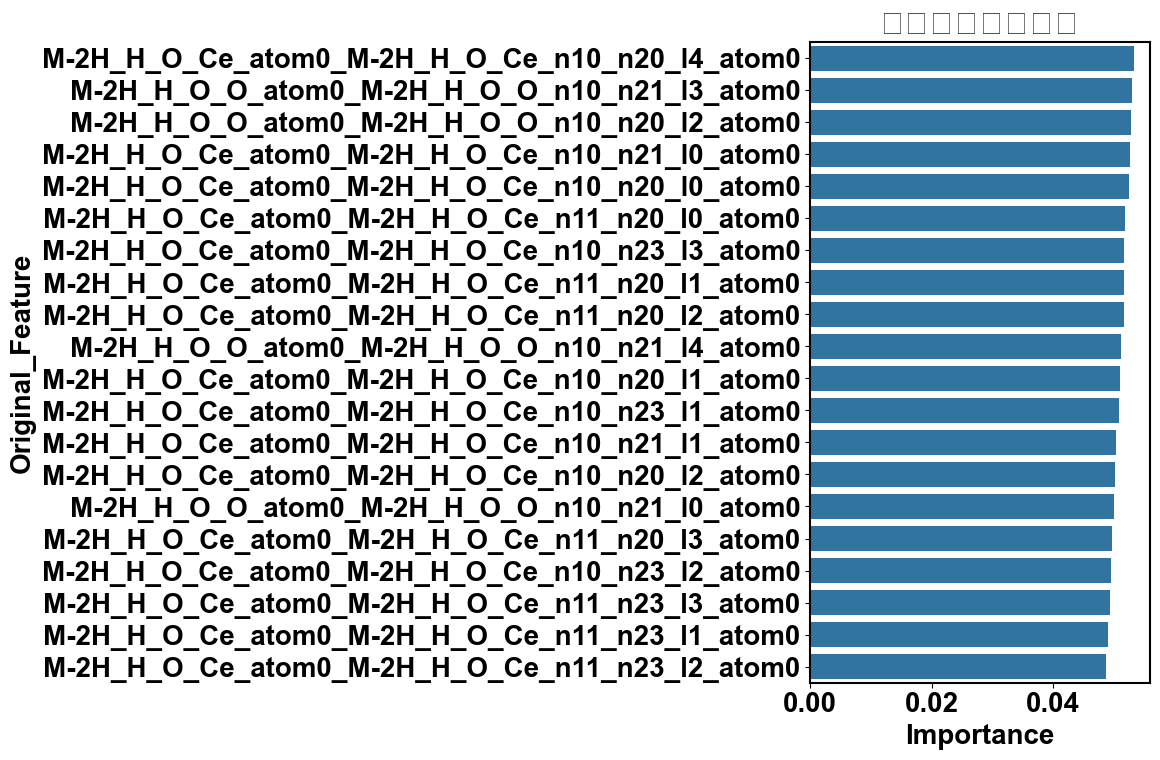

In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def analyze_important_features_with_pca(model_importance_file, pca_components_dir, output_dir=None):
    """
    分析模型重要特征对应的原始特征贡献
    
    参数:
        model_importance_file: 模型特征重要性文件路径
        pca_components_dir: PCA成分目录路径
        output_dir: 输出目录路径
    """
    if output_dir:
        os.makedirs(output_dir, exist_ok=True)
    
    # 读取模型特征重要性
    importance_df = pd.read_csv(model_importance_file)
    top_features = importance_df.head(10)
    
    # 分析每个重要特征
    original_feature_importance = {}
    
    for _, row in top_features.iterrows():
        feature_name = row['Feature']
        importance = row['Importance']
        
        # 解析特征组和PC编号
        if '_PC' in feature_name:
            parts = feature_name.split('_PC')
            feature_group = parts[0]
            pc_num = int(parts[1])
            
            # 读取该特征组的PCA成分文件
            safe_feature_group = feature_group.replace('/', '_')
            components_file = os.path.join(pca_components_dir, f"pca_components_{safe_feature_group}.csv")
            
            if os.path.exists(components_file):
                components_df = pd.read_csv(components_file)
                pc_row = components_df[components_df['principal_component'] == f'PC{pc_num}']
                
                if not pc_row.empty:
                    # 提取原始特征权重
                    weights = pc_row.iloc[0, 1:].abs()
                    
                    # 对每个原始特征，将其权重乘以PCA特征的重要性
                    for orig_feat, weight in weights.items():
                        contrib = weight * importance
                        key = f"{feature_group}_{orig_feat}"
                        
                        if key in original_feature_importance:
                            original_feature_importance[key] += contrib
                        else:
                            original_feature_importance[key] = contrib
    
    # 转换为DataFrame并排序
    orig_importance_df = pd.DataFrame({
        'Original_Feature': list(original_feature_importance.keys()),
        'Importance': list(original_feature_importance.values())
    })
    orig_importance_df.sort_values('Importance', ascending=False, inplace=True)
    
    # 输出前N个最重要的原始特征
    top_n = min(20, len(orig_importance_df))
    print(f"\n最重要的{top_n}个原始特征:")
    print(orig_importance_df.head(top_n))
    
    # 可视化
    plt.figure(figsize=(12, 8))
    sns.barplot(x='Importance', y='Original_Feature', data=orig_importance_df.head(20))
    plt.title('最重要的原始特征')
    plt.tight_layout()
    
    if output_dir:
        plt.savefig(os.path.join(output_dir, 'top_original_features.png'), dpi=300)
        orig_importance_df.to_csv(os.path.join(output_dir, 'original_feature_importance.csv'), index=False)
    
    plt.show()
    
    return orig_importance_df
if __name__ == "__main__":
    # SHAP特征重要性文件
    importance_file = "/Users/wukai/Desktop/project/wjob/src/wjob/ml/models/saved_models/importance_analysis_20250619_191323/shap_feature_importance_20250619_191323.csv"
    
    # PCA成分目录
    components_dir = "/Users/wukai/Desktop/project/wjob/data/fea/final/pca_plots_90pct/components"
    
    # 输出目录
    output_dir = "/Users/wukai/Desktop/project/wjob/reports/figures/original_feature_analysis"
    
    # 执行分析
    analyze_important_features_with_pca(importance_file, components_dir, output_dir)